<a href="https://colab.research.google.com/github/lblum95/AML/blob/master/task3/jannik_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


In [3]:
!pip install neurokit2
!pip install biosppy
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from biosppy.signals import ecg
from scipy.interpolate import interp1d

     |████████████████████████████████| 81kB 6.3MB/s 


In [97]:
x_train = pd.read_csv("data/X_train.csv", index_col=0, header=0, low_memory=False)
y_train = pd.read_csv("data/y_train.csv", index_col=0, header=0)
x_test = pd.read_csv("data/X_test.csv", index_col=0, header=0, low_memory=False)

0
   HRV_ULF  HRV_VLF  HRV_LF  HRV_HF  ...  HRV_LFHF  HRV_LFn  HRV_HFn  HRV_LnHF
0      NaN      NaN     NaN     NaN  ...       NaN      NaN      NaN       NaN

[1 rows x 9 columns]


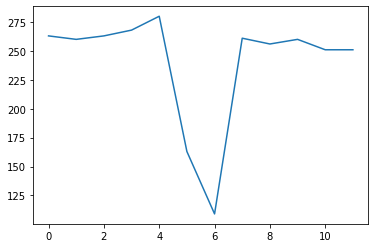

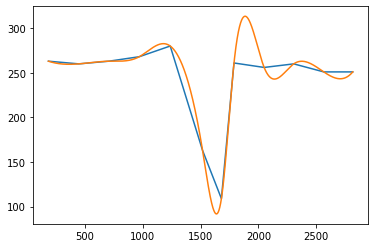

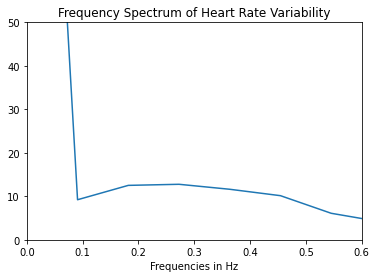

LF: 0.0
HF: 35.714877465979434





0
   HRV_ULF  HRV_VLF  HRV_LF    HRV_HF  ...  HRV_LFHF  HRV_LFn   HRV_HFn  HRV_LnHF
0      NaN      NaN     NaN  0.140784  ...       NaN      NaN  0.879234 -1.960526

[1 rows x 9 columns]


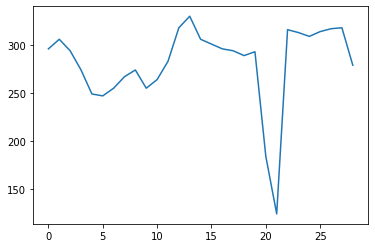

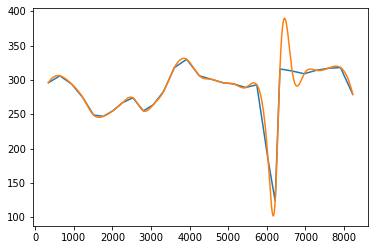

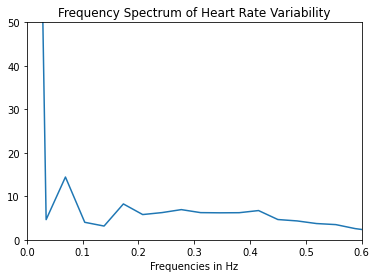

LF: 12.820892657160588
HF: 55.36356083429766





0
   HRV_ULF  HRV_VLF  HRV_LF    HRV_HF  ...  HRV_LFHF  HRV_LFn  HRV_HFn  HRV_LnHF
0      NaN      NaN     NaN  0.069391  ...       NaN      NaN  0.95052 -2.667998

[1 rows x 9 columns]


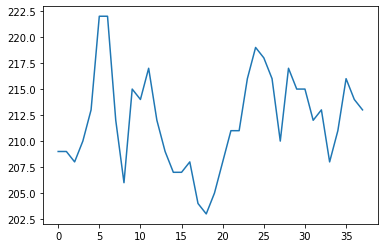

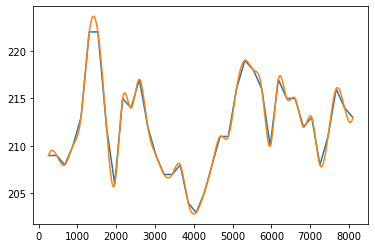

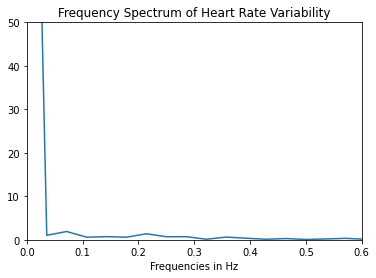

LF: 1.9143447278089334
HF: 4.495306332931724





2
   HRV_ULF  HRV_VLF  HRV_LF    HRV_HF  ...  HRV_LFHF  HRV_LFn  HRV_HFn  HRV_LnHF
0      NaN      NaN     NaN  0.131113  ...       NaN      NaN   0.8314 -2.031699

[1 rows x 9 columns]


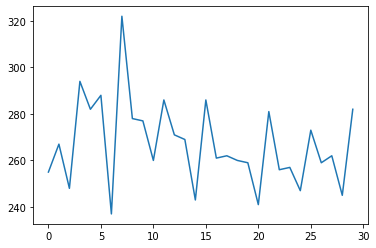

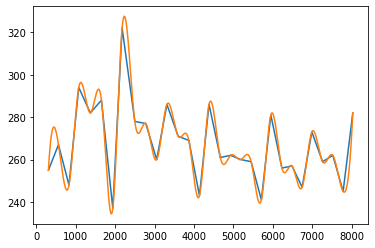

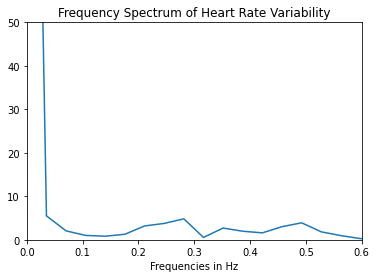

LF: 2.44328688572751
HF: 24.194487269091216





0
   HRV_ULF  HRV_VLF  HRV_LF  HRV_HF  ...  HRV_LFHF  HRV_LFn  HRV_HFn  HRV_LnHF
0      NaN      NaN     NaN     NaN  ...       NaN      NaN      NaN       NaN

[1 rows x 9 columns]


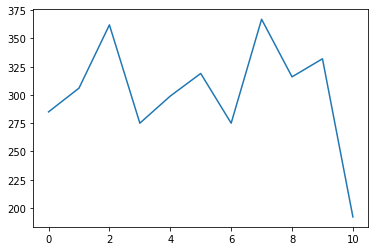

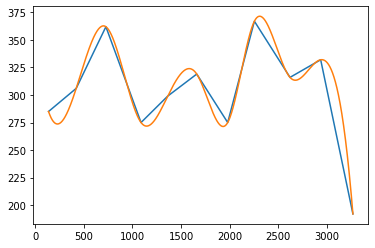

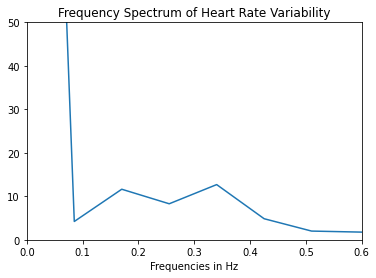

LF: 0.0
HF: 29.216177958689144





2
   HRV_ULF  HRV_VLF  HRV_LF   HRV_HF  ...  HRV_LFHF  HRV_LFn   HRV_HFn  HRV_LnHF
0      NaN      NaN     NaN  0.01732  ...       NaN      NaN  0.922552 -4.055882

[1 rows x 9 columns]


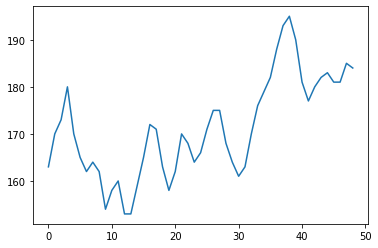

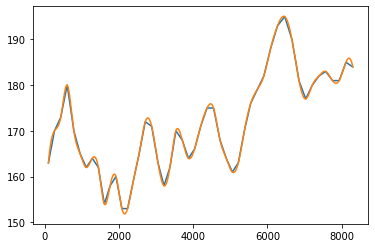

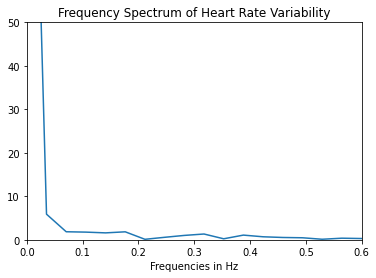

LF: 3.487596152025705
HF: 6.717315975811693





0
   HRV_ULF  HRV_VLF  HRV_LF    HRV_HF  ...  HRV_LFHF  HRV_LFn   HRV_HFn  HRV_LnHF
0      NaN      NaN     NaN  0.151063  ...       NaN      NaN  0.877452 -1.890058

[1 rows x 9 columns]


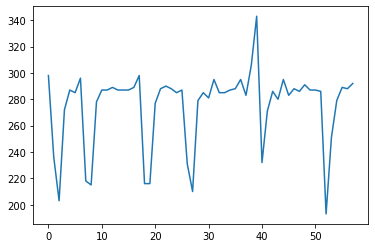

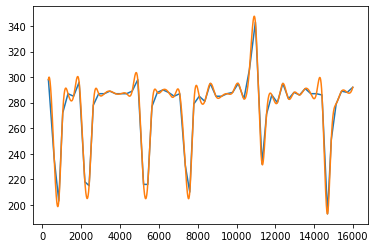

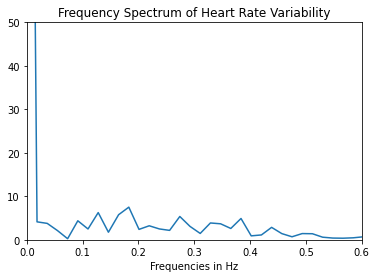

LF: 15.306951795526178
HF: 53.35011635641353





0
   HRV_ULF  HRV_VLF  HRV_LF    HRV_HF  ...  HRV_LFHF  HRV_LFn   HRV_HFn  HRV_LnHF
0      NaN      NaN     NaN  0.124626  ...       NaN      NaN  0.910206 -2.082439

[1 rows x 9 columns]


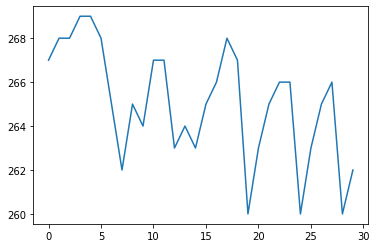

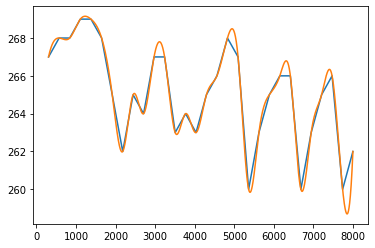

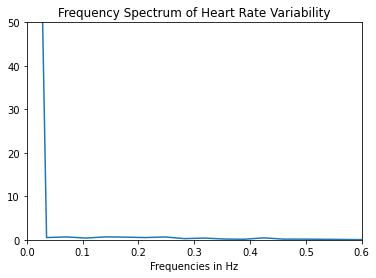

LF: 1.0686351245892578
HF: 3.115147621703605





0
   HRV_ULF  HRV_VLF  HRV_LF    HRV_HF  ...  HRV_LFHF  HRV_LFn   HRV_HFn  HRV_LnHF
0      NaN      NaN     NaN  0.114296  ...       NaN      NaN  0.941767 -2.168967

[1 rows x 9 columns]


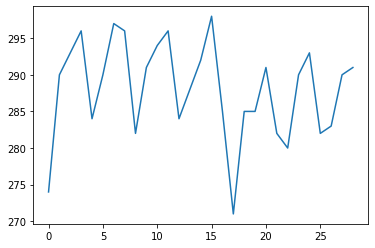

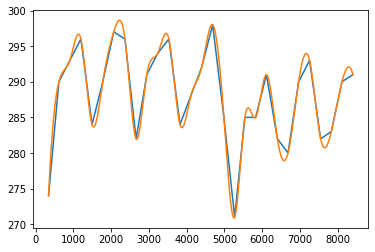

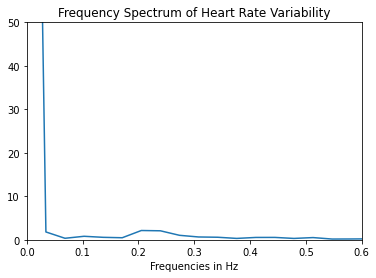

LF: 1.2679200610640873
HF: 8.282373632402948





2
   HRV_ULF  HRV_VLF  HRV_LF   HRV_HF  ...  HRV_LFHF  HRV_LFn   HRV_HFn  HRV_LnHF
0      NaN      NaN     NaN  0.13435  ...       NaN      NaN  0.654905 -2.007304

[1 rows x 9 columns]


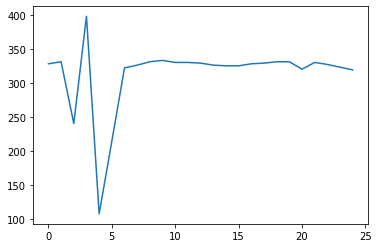

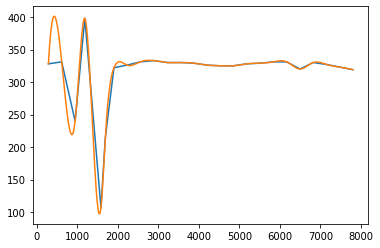

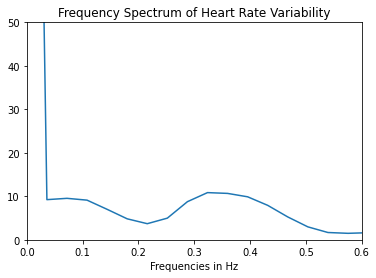

LF: 17.38998370564429
HF: 61.81462092259559







In [56]:
fs=300
for index in range(10):
  print(y_train['y'][index])
  ecg_signal = x_train.loc[index][:x_train.loc[index].last_valid_index()]
  ecg_signal = nk.ecg_clean(ecg_signal, sampling_rate=fs)

  # Extract R-peaks locations
  _, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=fs)
  r_interval=[rpeaks['ECG_R_Peaks'][index+1]-rpeaks['ECG_R_Peaks'][index] for index in range(len(rpeaks['ECG_R_Peaks'])-1)]
  print(nk.hrv_frequency(rpeaks,fs))
  plt.plot(r_interval)
  plt.show()
  RR_x_new = np.linspace(rpeaks['ECG_R_Peaks'][0],rpeaks['ECG_R_Peaks'][-2],rpeaks['ECG_R_Peaks'][-2])
  f=interp1d(rpeaks['ECG_R_Peaks'][:-1],r_interval, kind='cubic')
  plt.plot(rpeaks['ECG_R_Peaks'][:-1],r_interval)
  plt.plot(RR_x_new,f(RR_x_new))
  plt.show()
  n =  x_train.columns.get_loc(x_train.loc[index].last_valid_index())#Length of the signal
  frq = np.fft.fftfreq(n, d=((1/fs))) #divide the bins into frequency categories
  frq = frq[range(int(n/2))] #Get single side of the frequency range

  #Do FFT
  Y = np.fft.fft(f(RR_x_new))/n #Calculate FFT
  Y = Y[range(int(n/2))] #Return one side of the FFT

  #Plot
  plt.title("Frequency Spectrum of Heart Rate Variability")
  plt.xlim(0,0.6) #Limit X axis to frequencies of interest (0-0.6Hz for visibility, we are interested in 0.04-0.5)
  plt.ylim(0, 50) #Limit Y axis for visibility
  plt.plot(frq, abs(Y)) #Plot it
  plt.xlabel("Frequencies in Hz")
  plt.show()
  lf = np.trapz(abs(Y[(frq>=0.04) & (frq<=0.15)])) #Slice frequency spectrum where x is between 0.04 and 0.15Hz (LF), and use NumPy's trapezoidal integration function to find the area
  print("LF:", lf)

  hf = np.trapz(abs(Y[(frq>=0.16) & (frq<=0.5)])) #Do the same for 0.16-0.5Hz (HF)
  print("HF:", hf)
  print()
  print()
  print()
  print()
  print()

In [57]:
nk.hrv(rpeaks,fs)

,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,255.847358,1044.4,179.249257,261.346962,0.171629,0.244971,1093.333333,14.826,0.01356,23.333333,20.0,28.0,970.0,2.083333,NaN,NaN,NaN,0.13435,0.070795,NaN,NaN,0.654905,-2.007304,184.800209,181.048982,1.020719,105111.0604,0.979701,5.728619,709.495603,0.52,0.52381,0.636364,0.5,49.447853,52.682691,46.897279,47.619048,0.341222,0.658778,107.95083,149.995169,0.811646,0.188354,163.109535,78.574891,0.571608,0.428392,138.307813,119.734214,0.223379,0.209254


In [98]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import pywt
from biosppy.signals import ecg
from sklearn.preprocessing import StandardScaler

x_train = pd.read_csv("data/X_train.csv", index_col=0, header=0, low_memory=False,
                  dtype=float, na_values=['', '\n', '\\n'])
y_train = pd.read_csv("data/y_train.csv", index_col=0, header=0)
x_test = pd.read_csv("data/X_test.csv", index_col=0, header=0, low_memory=False,
                     dtype=float, na_values=['', '\n', '\\n'])

SAMPLING_RATE = 300.0

In [72]:
def create_df(dataframe: pd.DataFrame) -> pd.DataFrame:
    # get lengths of signals for each sample
    lengths = []
    width = dataframe.shape[1]

    for row in dataframe.index.tolist():
        temp_width = width
        for item in dataframe.loc[row][::-1]:
            if not pd.isna(item) and isinstance(item, float):
                temp_width -= 1
                break

            temp_width -= 1

        lengths.append(temp_width)

    names = ['R_ampl_mean', 'R_ampl_median', 'R_ampl_perc5', 'R_ampl_perc95', 'R_ampl_sd', 'R_nr_peaks',
             'len_mean', 'len_median', 'len_perc5', 'len_perc95', 'len_sd',
             'Qual_mean', 'Qual_median', 'Qual_perc5', 'Qual_perc95', 'Qual_sd',
             'Q_ampl_mean', 'Q_ampl_median', 'Q_ampl_perc5', 'Q_ampl_perc95', 'Q_ampl_sd', 'Q_nr_peaks',
             'Q_diff_mean', 'Q_diff_median', 'Q_diff_perc5', 'Q_diff_perc95', 'Q_diff_sd',
             'S_ampl_mean', 'S_ampl_median', 'S_ampl_perc5', 'S_ampl_perc95', 'S_ampl_sd', 'S_nr_peaks',
             'S_diff_mean', 'S_diff_median', 'S_diff_perc5', 'S_diff_perc95', 'S_diff_sd',
             'QRS_diff_mean', 'QRS_diff_median', 'QRS_diff_perc5', 'QRS_diff_perc95', 'QRS_diff_sd',
             'HRV_RMSSD', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN',
             'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_TINN', 'HRV_HTI',
             'HRV_ULF','HRV_VLF','HRV_LF','HRV_HF','HRV_VHF','HRV_LFHF','HRV_LFn','HRV_HFn', 	'HRV_LnHF',
             'HRV_SD1','HRV_SD2', 'HRV_SD1SD2','HRV_S','HRV_CSI','HRV_CVI','HRV_CSI_Modified', 'HRV_PIP',
             'HRV_IALS','HRV_PSS','HRV_PAS','HRV_GI','HRV_SI','HRV_AI','HRV_PI','HRV_C1d','HRV_C1a','HRV_SD1d',
             'HRV_SD1a','HRV_C2d','HRV_C2a','HRV_SD2d','HRV_SD2a','HRV_Cd','HRV_Ca','HRV_SDNNd','HRV_SDNNa','HRV_ApEn',
             'HRV_SampEn','J_LF','J_HF','J_L/H']

    data = np.empty([dataframe.shape[0], len(names)])

    iteration = 0
    for row_index, row in dataframe.iterrows():
        print(row_index)

        # Retrieve ECG data
        ecg_signal = row[:lengths[iteration] + 1]
        ecg_signal = nk.ecg_clean(ecg_signal, sampling_rate=SAMPLING_RATE)

        # Find R-peaks
        peaks, info = nk.ecg_peaks(ecg_signal, sampling_rate=SAMPLING_RATE)

        # R amplitude
        R_amplitudes = ecg_signal[info['ECG_R_Peaks']]

        # Check if the signal is flipped
        # Check if we have enough peaks to retrieve more information
        if len(R_amplitudes) > 4:

            _, waves_peak = nk.ecg_delineate(ecg_signal, info, sampling_rate=300, show=False)

            # Q amplitude

            # remove nan values
            Q_amplitudes = [ecg_signal[peak_index] if str(peak_index) != 'nan' else - np.infty for peak_index in
                            waves_peak['ECG_Q_Peaks']]

            if np.sum([1 if np.abs(rpeak) > np.abs(Q_amplitudes[index]) else -1 for index, rpeak in
                       enumerate(R_amplitudes)]) < 0:
                print("flip", row_index)

                ecg_signal = -ecg_signal

                peaks, info = nk.ecg_peaks(ecg_signal, sampling_rate=300)

                # R amplitude
                R_amplitudes = ecg_signal[info['ECG_R_Peaks']]

                if len(R_amplitudes) > 4:
                    _, waves_peak = nk.ecg_delineate(ecg_signal, info, sampling_rate=300, show=False)

        data_temp = []
        if len(R_amplitudes) > 0:
            data_temp = [np.mean(R_amplitudes),
                         np.median(R_amplitudes),
                         np.percentile(R_amplitudes, q=5),
                         np.percentile(R_amplitudes, q=95),
                         np.std(R_amplitudes),
                         len(R_amplitudes)]
        else:
            empty = np.empty([6])
            empty[:] = np.NaN
            data_temp += empty.tolist()

        # length of signal
        data_new = [np.mean(lengths[iteration] / SAMPLING_RATE),
                    np.median(lengths[iteration] / SAMPLING_RATE),
                    np.percentile(lengths[iteration] / SAMPLING_RATE, q=5),
                    np.percentile(lengths[iteration] / SAMPLING_RATE, q=95),
                    np.std(lengths[iteration] / SAMPLING_RATE)]

        data_temp += data_new

        # Check if we have enough peaks to retrieve more information
        if len(R_amplitudes) > 4:

            quality = nk.ecg_quality(ecg_signal, sampling_rate=SAMPLING_RATE)
            data_new = [np.mean(quality),
                        np.median(quality),
                        np.percentile(quality, q=5),
                        np.percentile(quality, q=95),
                        np.std(quality)]

            data_temp += data_new

            # Delineate the ECG signal
            # “ECG_P_Peaks”, “ECG_Q_Peaks”, “ECG_S_Peaks”, “ECG_T_Peaks”, “ECG_P_Onsets”, “ECG_T_Offsets”

            # _, waves_peak = nk.ecg_delineate(ecg_signal, info, sampling_rate=SAMPLING_RATE, show=False)

            # Q amplitude

            # remove nan values
            Q_peaks = [peak for peak in waves_peak['ECG_Q_Peaks'] if str(peak) != 'nan']

            if len(Q_peaks) > 0:
                Q_amplitudes = ecg_signal[Q_peaks]

                data_new = [np.mean(Q_amplitudes),
                            np.median(Q_amplitudes),
                            np.percentile(Q_amplitudes, q=5),
                            np.percentile(Q_amplitudes, q=95),
                            np.std(Q_amplitudes),
                            len(Q_amplitudes)]

                data_temp += data_new
            else:
                empty = np.empty([6])
                empty[:] = np.NaN
                empty[5] = 0
                data_temp += empty.tolist()

            # more than 1 Q-Peak => can build interval[s]
            if len(Q_peaks) > 1:
                Q_peaks_diff = [(Q_peaks[index + 1] - Q_peaks[index]) / SAMPLING_RATE
                                for index, item in enumerate(Q_peaks[:len(Q_peaks) - 1])]

                # QQ interval

                data_new = [np.mean(Q_peaks_diff),
                            np.median(Q_peaks_diff),
                            np.percentile(Q_peaks_diff, q=5),
                            np.percentile(Q_peaks_diff, q=95),
                            np.std(Q_peaks_diff)]

                data_temp += data_new

            # 0 or 1 Q-peak = no interval => return nan
            else:
                empty = np.empty([5])
                empty[:] = np.NaN
                data_temp += empty.tolist()

            # S amplitude

            # remove nan values
            S_peaks = [peak for peak in waves_peak['ECG_S_Peaks'] if str(peak) != 'nan']

            if len(S_peaks) > 0:
                S_amplitudes = ecg_signal[S_peaks]

                data_new = [np.mean(S_amplitudes),
                            np.median(S_amplitudes),
                            np.percentile(S_amplitudes, q=5),
                            np.percentile(S_amplitudes, q=95),
                            np.std(S_amplitudes),
                            len(S_amplitudes)]

                data_temp += data_new

            else:
                empty = np.empty([6])
                empty[:] = np.NaN
                empty[5] = 0
                data_temp += empty.tolist()

            # more than one S-peak
            if len(S_peaks) > 1:
                S_peaks_diff = [(S_peaks[index + 1] - S_peaks[index]) / SAMPLING_RATE
                                for index, item in enumerate(S_peaks[:len(S_peaks) - 1])]

                # SS interval

                data_new = [np.mean(S_peaks_diff),
                            np.median(S_peaks_diff),
                            np.percentile(S_peaks_diff, q=5),
                            np.percentile(S_peaks_diff, q=95),
                            np.std(S_peaks_diff)]

                data_temp += data_new

            # 0 or 1 S-peak = no interval => return nan
            else:
                empty = np.empty([5])
                empty[:] = np.NaN
                data_temp += empty.tolist()

            # QRS interval

            QRS_peaks_diff = []

            # compute difference between Q and S peak
            for index in range(len(waves_peak['ECG_Q_Peaks'])):
                if not (np.isnan(waves_peak['ECG_Q_Peaks'][index]) or np.isnan(waves_peak['ECG_S_Peaks'][index])):
                    QRS_peaks_diff.append(
                        (waves_peak['ECG_S_Peaks'][index] - waves_peak['ECG_Q_Peaks'][index]) / SAMPLING_RATE)

            if len(QRS_peaks_diff) > 0:
                data_new = [np.mean(QRS_peaks_diff),
                            np.median(QRS_peaks_diff),
                            np.percentile(QRS_peaks_diff, q=5),
                            np.percentile(QRS_peaks_diff, q=95),
                            np.std(QRS_peaks_diff)]

                data_temp += data_new

            else:
                empty = np.empty([5])
                empty[:] = np.NaN
                data_temp += empty.tolist()
        #HRV
            hrv_time = nk.hrv(peaks, sampling_rate=SAMPLING_RATE, show=False)

            data_new = hrv_time.values.tolist()[0]

            data_temp += data_new

            # Jannik
            # http://www.paulvangent.com/2016/03/21/analyzing-a-discrete-heart-rate-signal-using-python-part-2/
            rpeaks=info['ECG_R_Peaks']
            r_interval=[rpeaks[index+1]-rpeaks[index] for index in range(len(rpeaks)-1)]
            RR_x_new = np.linspace(rpeaks[0],rpeaks[-2],rpeaks[-2])
            f=interp1d(rpeaks[:-1],r_interval, kind='cubic')

            n =  lengths[iteration] + 1#Length of the signal
            frq = np.fft.fftfreq(n, d=((1/SAMPLING_RATE))) #divide the bins into frequency categories
            frq = frq[range(int(n/2))] #Get single side of the frequency range

            Y = np.fft.fft(f(RR_x_new))/n #Calculate FFT
            Y = Y[range(int(n/2))]
            lf = np.trapz(abs(Y[(frq>=0.04) & (frq<=0.15)])) 

            hf = np.trapz(abs(Y[(frq>=0.16) & (frq<=0.5)])) #Do the same for 0.16-0.5Hz (HF)


            data_new = [lf,hf,lf/hf]

            data_temp += data_new
        # if we don't have enough R peaks return vector of nan's
        else:
            print('not enough peaks')
            empty = np.empty([32+52+3])
            empty[:] = np.NaN
            data_temp += empty.tolist()

        data[iteration] = data_temp

        iteration += 1
    features = pd.DataFrame(data, columns=names)

    return features

# Feature extraction
x_train_features = create_df(x_train)
x_train_features.to_csv('data/X_train_Jannik.csv')

x_test_features = create_df(x_test)
x_test_features.to_csv('data/X_test_Jannik.csv')

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
flip 11.0
12.0
13.0
14.0
15.0
16.0
flip 16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
flip 25.0
26.0
27.0
28.0
29.0
30.0
flip 30.0
31.0
flip 31.0
32.0
33.0
34.0
35.0
36.0
flip 36.0
37.0
38.0
39.0
40.0
flip 40.0
41.0
42.0
43.0
flip 43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
flip 58.0
59.0
60.0
61.0
62.0
63.0
flip 63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
flip 71.0
72.0
73.0
flip 73.0
74.0
75.0
76.0
not enough peaks
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
flip 92.0
93.0
94.0
flip 94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
flip 102.0
103.0
104.0
105.0
flip 105.0
106.0
107.0
108.0
109.0
110.0
111.0
flip 111.0
112.0
113.0
114.0
115.0
116.0
flip 116.0
117.0
118.0
119.0
flip 119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
flip 128.0
129.0
130.0
flip 130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


168.0
flip 168.0
169.0
170.0
171.0
172.0
173.0
174.0
flip 174.0
175.0
176.0
177.0
178.0
179.0
180.0
181.0
182.0
183.0
184.0
flip 184.0
185.0
186.0
187.0
188.0
189.0
flip 189.0
190.0
191.0
192.0
193.0
194.0
195.0
flip 195.0
196.0
197.0
198.0
199.0
flip 199.0
200.0
flip 200.0
201.0
202.0
203.0
204.0
205.0
206.0
207.0
208.0
209.0
flip 209.0
210.0
211.0
212.0
213.0
214.0
215.0
216.0
217.0
218.0
219.0
220.0
221.0
222.0
223.0
224.0
225.0
226.0
227.0
228.0
229.0
230.0
231.0
232.0
233.0
234.0
235.0
236.0
237.0
238.0
flip 238.0
239.0
flip 239.0
240.0
241.0
242.0
243.0
244.0
245.0
246.0
247.0
248.0
249.0
250.0
251.0
252.0
253.0
254.0
255.0
256.0
257.0
258.0
259.0
260.0
flip 260.0
261.0
262.0
263.0
264.0
265.0
266.0
267.0
flip 267.0
268.0
269.0
270.0
271.0
flip 271.0
272.0
273.0
274.0
275.0
276.0
277.0
278.0
279.0
flip 279.0
280.0
281.0
282.0
283.0
284.0
285.0
286.0
287.0
288.0
289.0
290.0
291.0
292.0
293.0
294.0
295.0
296.0
297.0
298.0
299.0
300.0
301.0
flip 301.0
302.0
303.0
304.0
305.0
306.0
3

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


322.0
323.0
324.0
325.0
326.0
327.0
328.0
329.0
flip 329.0
330.0
flip 330.0
331.0
332.0
333.0
334.0
335.0
336.0
337.0
338.0
339.0
340.0
341.0
342.0
343.0
344.0
345.0
346.0
347.0
348.0
flip 348.0
349.0
350.0
flip 350.0
351.0
352.0
flip 352.0
353.0
354.0
355.0
356.0
357.0
358.0
359.0
360.0
flip 360.0
361.0
362.0
363.0
364.0
365.0
flip 365.0
366.0
367.0
368.0
369.0
370.0
371.0
flip 371.0
372.0
373.0
374.0
375.0
flip 375.0
376.0
377.0
378.0
379.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


380.0
381.0
382.0
383.0
flip 383.0
384.0
385.0
flip 385.0
386.0
387.0
388.0
flip 388.0
389.0
390.0
flip 390.0
391.0
392.0
393.0
flip 393.0
394.0
395.0
flip 395.0
396.0
397.0
398.0
399.0
400.0
401.0
402.0
403.0
404.0
405.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


406.0
flip 406.0
407.0
408.0
409.0
410.0
411.0
412.0
413.0
414.0
415.0
416.0
417.0
418.0
419.0
420.0
421.0
422.0
423.0
424.0
425.0
426.0
427.0
428.0
429.0
flip 429.0
430.0
431.0
432.0
433.0
flip 433.0
434.0
435.0
436.0
437.0
438.0
439.0
440.0
441.0
442.0
443.0
444.0
445.0
flip 445.0
446.0
447.0
448.0
449.0
450.0
451.0
452.0
453.0
flip 453.0
454.0
455.0
456.0
457.0
458.0
flip 458.0
459.0
460.0
461.0
462.0
463.0
464.0
465.0
466.0
flip 466.0
467.0
468.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


469.0
470.0
471.0
472.0
473.0
flip 473.0
474.0
475.0
476.0
477.0
478.0
479.0
480.0
481.0
482.0
483.0
484.0
485.0
flip 485.0
486.0
487.0
488.0
489.0
490.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


491.0
492.0
493.0
494.0
flip 494.0
495.0
496.0
497.0
flip 497.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


498.0
flip 498.0
499.0
500.0
501.0
502.0
503.0
504.0
505.0
506.0
507.0
508.0
509.0
510.0
511.0
flip 511.0
512.0
513.0
flip 513.0
514.0
flip 514.0
515.0
flip 515.0
516.0
flip 516.0
517.0
flip 517.0
518.0
flip 518.0
519.0
520.0
521.0
522.0
523.0
524.0
525.0
526.0
527.0
528.0
529.0
530.0
531.0
532.0
533.0
534.0
535.0
flip 535.0
536.0
537.0
538.0
539.0
540.0
541.0
542.0
543.0
flip 543.0
544.0
545.0
546.0
547.0
flip 547.0
548.0
549.0
550.0
flip 550.0
551.0
552.0
553.0
554.0
flip 554.0
555.0
556.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


557.0
558.0
559.0
flip 559.0
560.0
561.0
562.0
563.0
564.0
565.0
566.0
567.0
568.0
569.0
570.0
571.0
572.0
573.0
574.0
575.0
576.0
577.0
578.0
579.0
580.0
581.0
582.0
flip 582.0
583.0
584.0
585.0
586.0
587.0
588.0
589.0
590.0
591.0
flip 591.0
592.0
593.0
594.0
595.0
596.0
597.0
flip 597.0
598.0
flip 598.0
599.0
600.0
601.0
flip 601.0
602.0
603.0
604.0
605.0
flip 605.0
606.0
607.0
608.0
609.0
610.0
611.0
flip 611.0
612.0
613.0
614.0
flip 614.0
615.0
flip 615.0
616.0
617.0
flip 617.0
618.0
619.0
620.0
621.0
flip 621.0
622.0
623.0
624.0
625.0
626.0
627.0
628.0
flip 628.0
629.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


630.0
631.0
632.0
633.0
634.0
635.0
636.0
637.0
638.0
639.0
640.0
641.0
642.0
643.0
644.0
flip 644.0
645.0
646.0
647.0
648.0
649.0
650.0
651.0
652.0
653.0
654.0
655.0
656.0
657.0
flip 657.0
658.0
659.0
660.0
661.0
662.0
663.0
664.0
665.0
666.0
667.0
flip 667.0
668.0
669.0
670.0
671.0
flip 671.0
672.0
673.0
674.0
675.0
676.0
flip 676.0
677.0
678.0
flip 678.0
679.0
680.0
681.0
682.0
683.0
flip 683.0
684.0
685.0
686.0
687.0
flip 687.0
688.0
689.0
690.0
691.0
692.0
flip 692.0
693.0
694.0
695.0
696.0
697.0
698.0
flip 698.0
699.0
700.0
701.0
702.0
703.0
flip 703.0
704.0
705.0
706.0
707.0
708.0
709.0
710.0
711.0
712.0
713.0
714.0
715.0
716.0
flip 716.0
717.0
718.0
719.0
720.0
721.0
722.0
723.0
724.0
flip 724.0
725.0
726.0
727.0
728.0
729.0
730.0
731.0
732.0
733.0
flip 733.0
734.0
735.0
736.0
737.0
738.0
739.0
740.0
741.0
742.0
743.0
744.0
745.0
746.0
747.0
748.0
749.0
750.0
flip 750.0
751.0
752.0
753.0
754.0
755.0
756.0
757.0
758.0
759.0
760.0
761.0
762.0
763.0
flip 763.0
764.0
765.0
766.0
76

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


785.0
786.0
787.0
788.0
789.0
flip 789.0
790.0
791.0
792.0
793.0
794.0
flip 794.0
795.0
796.0
797.0
798.0
799.0
800.0
801.0
flip 801.0
802.0
803.0
804.0
805.0
806.0
807.0
flip 807.0
808.0
809.0
810.0
811.0
812.0
813.0
814.0
flip 814.0
815.0
816.0
flip 816.0
817.0
818.0
819.0
820.0
821.0
822.0
823.0
824.0
825.0
826.0
827.0
828.0
flip 828.0
829.0
830.0
831.0
832.0
flip 832.0
833.0
834.0
flip 834.0
835.0
836.0
flip 836.0
837.0
838.0
839.0
840.0
841.0
842.0
843.0
844.0
845.0
846.0
847.0
848.0
849.0
850.0
flip 850.0
851.0
852.0
flip 852.0
853.0
854.0
flip 854.0
855.0
856.0
857.0
858.0
859.0
860.0
861.0
862.0
863.0
864.0
flip 864.0
865.0
flip 865.0
866.0
867.0
868.0
869.0
870.0
871.0
872.0
873.0
874.0
875.0
876.0
877.0
878.0
flip 878.0
879.0
880.0
flip 880.0
881.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


882.0
flip 882.0
883.0
884.0
885.0
886.0
887.0
888.0
flip 888.0
889.0
890.0
891.0
892.0
893.0
894.0
895.0
896.0
897.0
898.0
899.0
900.0
901.0
902.0
903.0
904.0
905.0
906.0
907.0
908.0
flip 908.0
909.0
910.0
911.0
912.0
913.0
flip 913.0
914.0
915.0
916.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


917.0
flip 917.0
918.0
919.0
920.0
921.0
922.0
923.0
924.0
925.0
926.0
927.0
928.0
flip 928.0
929.0
930.0
flip 930.0
931.0
932.0
933.0
934.0
935.0
flip 935.0
936.0
937.0
938.0
939.0
940.0
941.0
942.0
943.0
flip 943.0
944.0
945.0
946.0
947.0
948.0
949.0
950.0
951.0
952.0
flip 952.0
953.0
954.0
flip 954.0
955.0
956.0
flip 956.0
957.0
not enough peaks
958.0
959.0
960.0
961.0
962.0
963.0
964.0
965.0
966.0
967.0
968.0
969.0
970.0
971.0
972.0
973.0
974.0
975.0
976.0
flip 976.0
977.0
978.0
979.0
980.0
981.0
982.0
983.0
984.0
985.0
flip 985.0
986.0
987.0
flip 987.0
988.0
989.0
flip 989.0
990.0
991.0
992.0
993.0
994.0
995.0
996.0
997.0
998.0
999.0
flip 999.0
1000.0
1001.0
1002.0
1003.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1004.0
1005.0
1006.0
1007.0
1008.0
1009.0
1010.0
1011.0
1012.0
1013.0
1014.0
1015.0
flip 1015.0
1016.0
1017.0
1018.0
1019.0
1020.0
1021.0
1022.0
1023.0
1024.0
flip 1024.0
1025.0
1026.0
flip 1026.0
1027.0
1028.0
1029.0
1030.0
1031.0
1032.0
1033.0
1034.0
flip 1034.0
1035.0
1036.0
1037.0
1038.0
1039.0
1040.0
1041.0
1042.0
flip 1042.0
1043.0
1044.0
1045.0
flip 1045.0
1046.0
flip 1046.0
1047.0
flip 1047.0
1048.0
1049.0
1050.0
1051.0
1052.0
1053.0
1054.0
1055.0
1056.0
1057.0
1058.0
1059.0
flip 1059.0
1060.0
1061.0
1062.0
flip 1062.0
not enough peaks
1063.0
flip 1063.0
1064.0
1065.0
flip 1065.0
1066.0
flip 1066.0
1067.0
flip 1067.0
1068.0
1069.0
1070.0
1071.0
1072.0
1073.0
1074.0
1075.0
1076.0
1077.0
flip 1077.0
1078.0
flip 1078.0
1079.0
flip 1079.0
1080.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1081.0
1082.0
1083.0
1084.0
1085.0
1086.0
1087.0
1088.0
flip 1088.0
1089.0
1090.0
1091.0
flip 1091.0
1092.0
flip 1092.0
1093.0
flip 1093.0
1094.0
1095.0
flip 1095.0
1096.0
1097.0
1098.0
1099.0
flip 1099.0
1100.0
1101.0
1102.0
1103.0
1104.0
1105.0
1106.0
1107.0
1108.0
1109.0
1110.0
1111.0
1112.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1113.0
1114.0
1115.0
flip 1115.0
1116.0
1117.0
1118.0
1119.0
1120.0
1121.0
1122.0
1123.0
1124.0
1125.0
1126.0
flip 1126.0
1127.0
flip 1127.0
1128.0
1129.0
1130.0
1131.0
1132.0
1133.0
flip 1133.0
1134.0
1135.0
1136.0
1137.0
1138.0
1139.0
1140.0
1141.0
1142.0
1143.0
flip 1143.0
1144.0
1145.0
1146.0
1147.0
flip 1147.0
1148.0
1149.0
1150.0
1151.0
1152.0
1153.0
1154.0
1155.0
1156.0
1157.0
flip 1157.0
1158.0
1159.0
1160.0
flip 1160.0
1161.0
flip 1161.0
1162.0
1163.0
1164.0
flip 1164.0
1165.0
1166.0
flip 1166.0
1167.0
flip 1167.0
1168.0
1169.0
1170.0
flip 1170.0
1171.0
1172.0
1173.0
1174.0
1175.0
1176.0
1177.0
1178.0
1179.0
flip 1179.0
1180.0
flip 1180.0
1181.0
1182.0
1183.0
1184.0
1185.0
1186.0
1187.0
flip 1187.0
1188.0
1189.0
flip 1189.0
1190.0
1191.0
1192.0
1193.0
1194.0
1195.0
flip 1195.0
1196.0
1197.0
1198.0
1199.0
1200.0
1201.0
1202.0
1203.0
flip 1203.0
1204.0
1205.0
1206.0
1207.0
1208.0
1209.0
flip 1209.0
1210.0
1211.0
1212.0
flip 1212.0
1213.0
flip 1213.0
1214.0
1215.0
1216.0
1217.0
f

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1416.0
1417.0
flip 1417.0
1418.0
1419.0
1420.0
1421.0
1422.0
1423.0
1424.0
1425.0
1426.0
1427.0
1428.0
1429.0
1430.0
1431.0
flip 1431.0
1432.0
flip 1432.0
1433.0
1434.0
1435.0
1436.0
flip 1436.0
1437.0
1438.0
1439.0
1440.0
1441.0
1442.0
1443.0
1444.0
1445.0
1446.0
1447.0
1448.0
1449.0
1450.0
1451.0
1452.0
1453.0
1454.0
1455.0
1456.0
1457.0
1458.0
1459.0
1460.0
1461.0
flip 1461.0
1462.0
flip 1462.0
1463.0
1464.0
flip 1464.0
1465.0
1466.0
1467.0
1468.0
1469.0
1470.0
flip 1470.0
1471.0
1472.0
1473.0
1474.0
1475.0
1476.0
1477.0
1478.0
1479.0
1480.0
1481.0
1482.0
1483.0
1484.0
1485.0
1486.0
flip 1486.0
1487.0
1488.0
flip 1488.0
1489.0
1490.0
1491.0
1492.0
1493.0
flip 1493.0
1494.0
1495.0
1496.0
1497.0
1498.0
1499.0
1500.0
flip 1500.0
1501.0
flip 1501.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1502.0
1503.0
1504.0
flip 1504.0
1505.0
1506.0
flip 1506.0
1507.0
1508.0
1509.0
1510.0
1511.0
1512.0
1513.0
1514.0
1515.0
flip 1515.0
1516.0
flip 1516.0
1517.0
1518.0
1519.0
1520.0
1521.0
1522.0
1523.0
1524.0
1525.0
1526.0
1527.0
flip 1527.0
1528.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1529.0
1530.0
1531.0
1532.0
1533.0
flip 1533.0
1534.0
1535.0
1536.0
1537.0
1538.0
1539.0
flip 1539.0
1540.0
1541.0
1542.0
1543.0
1544.0
flip 1544.0
1545.0
1546.0
flip 1546.0
1547.0
1548.0
1549.0
1550.0
1551.0
1552.0
1553.0
1554.0
1555.0
1556.0
1557.0
1558.0
1559.0
1560.0
1561.0
1562.0
1563.0
1564.0
1565.0
1566.0
1567.0
1568.0
1569.0
flip 1569.0
1570.0
1571.0
1572.0
1573.0
1574.0
1575.0
1576.0
1577.0
1578.0
1579.0
1580.0
1581.0
1582.0
1583.0
flip 1583.0
1584.0
flip 1584.0
1585.0
flip 1585.0
1586.0
1587.0
1588.0
1589.0
1590.0
flip 1590.0
1591.0
1592.0
flip 1592.0
1593.0
1594.0
1595.0
1596.0
1597.0
1598.0
1599.0
1600.0
1601.0
1602.0
1603.0
1604.0
1605.0
1606.0
1607.0
1608.0
1609.0
1610.0
flip 1610.0
1611.0
1612.0
1613.0
1614.0
1615.0
1616.0
1617.0
1618.0
1619.0
1620.0
1621.0
1622.0
1623.0
1624.0
1625.0
1626.0
1627.0
1628.0
1629.0
1630.0
1631.0
1632.0
1633.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1634.0
1635.0
1636.0
1637.0
1638.0
1639.0
1640.0
1641.0
1642.0
1643.0
1644.0
1645.0
1646.0
1647.0
flip 1647.0
1648.0
1649.0
flip 1649.0
1650.0
1651.0
flip 1651.0
1652.0
1653.0
1654.0
flip 1654.0
1655.0
1656.0
flip 1656.0
1657.0
1658.0
flip 1658.0
1659.0
1660.0
1661.0
1662.0
1663.0
1664.0
1665.0
flip 1665.0
1666.0
flip 1666.0
1667.0
1668.0
flip 1668.0
1669.0
1670.0
1671.0
1672.0
1673.0
1674.0
1675.0
flip 1675.0
1676.0
1677.0
1678.0
1679.0
1680.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1681.0
1682.0
1683.0
1684.0
1685.0
1686.0
1687.0
1688.0
1689.0
1690.0
1691.0
flip 1691.0
1692.0
1693.0
1694.0
1695.0
1696.0
1697.0
1698.0
1699.0
flip 1699.0
1700.0
1701.0
1702.0
1703.0
1704.0
1705.0
1706.0
1707.0
1708.0
1709.0
1710.0
1711.0
1712.0
1713.0
1714.0
1715.0
1716.0
flip 1716.0
1717.0
1718.0
flip 1718.0
1719.0
1720.0
1721.0
1722.0
1723.0
1724.0
1725.0
1726.0
flip 1726.0
1727.0
1728.0
1729.0
1730.0
1731.0
1732.0
1733.0
1734.0
1735.0
1736.0
1737.0
flip 1737.0
1738.0
1739.0
1740.0
flip 1740.0
1741.0
1742.0
1743.0
1744.0
1745.0
1746.0
1747.0
1748.0
1749.0
1750.0
1751.0
1752.0
1753.0
flip 1753.0
1754.0
1755.0
1756.0
1757.0
1758.0
1759.0
1760.0
flip 1760.0
1761.0
flip 1761.0
1762.0
1763.0
1764.0
flip 1764.0
1765.0
1766.0
flip 1766.0
1767.0
1768.0
1769.0
flip 1769.0
1770.0
1771.0
1772.0
1773.0
1774.0
1775.0
1776.0
1777.0
1778.0
flip 1778.0
1779.0
1780.0
1781.0
1782.0
1783.0
1784.0
1785.0
1786.0
1787.0
1788.0
1789.0
1790.0
1791.0
1792.0
1793.0
1794.0
1795.0
1796.0
1797.0
1798.0
flip 1

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1872.0
1873.0
flip 1873.0
1874.0
1875.0
1876.0
1877.0
flip 1877.0
1878.0
flip 1878.0
1879.0
1880.0
flip 1880.0
1881.0
1882.0
1883.0
1884.0
1885.0
1886.0
1887.0
1888.0
1889.0
1890.0
flip 1890.0
1891.0
1892.0
1893.0
1894.0
1895.0
1896.0
1897.0
1898.0
1899.0
1900.0
1901.0
1902.0
1903.0
flip 1903.0
1904.0
1905.0
1906.0
1907.0
1908.0
1909.0
1910.0
flip 1910.0
1911.0
flip 1911.0
1912.0
1913.0
1914.0
1915.0
1916.0
1917.0
1918.0
flip 1918.0
1919.0
flip 1919.0
1920.0
1921.0
1922.0
flip 1922.0
1923.0
flip 1923.0
1924.0
flip 1924.0
1925.0
1926.0
1927.0
1928.0
1929.0
flip 1929.0
1930.0
flip 1930.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1931.0
1932.0
1933.0
1934.0
1935.0
flip 1935.0
1936.0
1937.0
1938.0
flip 1938.0
1939.0
1940.0
1941.0
flip 1941.0
1942.0
1943.0
1944.0
1945.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1946.0
1947.0
1948.0
flip 1948.0
1949.0
flip 1949.0
1950.0
1951.0
1952.0
1953.0
1954.0
1955.0
flip 1955.0
1956.0
1957.0
1958.0
1959.0
1960.0
1961.0
1962.0
1963.0
1964.0
flip 1964.0
1965.0
1966.0
1967.0
1968.0
1969.0
1970.0
1971.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1972.0
1973.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1974.0
flip 1974.0
1975.0
flip 1975.0
1976.0
1977.0
flip 1977.0
1978.0
flip 1978.0
1979.0
1980.0
1981.0
1982.0
1983.0
1984.0
1985.0
1986.0
1987.0
1988.0
1989.0
flip 1989.0
1990.0
1991.0
1992.0
1993.0
1994.0
1995.0
1996.0
1997.0
1998.0
1999.0
2000.0
2001.0
2002.0
2003.0
2004.0
2005.0
2006.0
2007.0
2008.0
2009.0
2010.0
2011.0
2012.0
2013.0
2014.0
2015.0
2016.0
flip 2016.0
2017.0
2018.0
flip 2018.0
2019.0
2020.0
2021.0
2022.0
flip 2022.0
2023.0
2024.0
2025.0
flip 2025.0
2026.0
2027.0
2028.0
2029.0
flip 2029.0
2030.0
2031.0
2032.0
2033.0
2034.0
2035.0
2036.0
2037.0
flip 2037.0
2038.0
2039.0
2040.0
2041.0
2042.0
2043.0
2044.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2045.0
2046.0
2047.0
flip 2047.0
2048.0
2049.0
2050.0
2051.0
2052.0
2053.0
2054.0
2055.0
flip 2055.0
2056.0
2057.0
2058.0
2059.0
2060.0
2061.0
2062.0
flip 2062.0
2063.0
2064.0
2065.0
2066.0
flip 2066.0
2067.0
2068.0
flip 2068.0
2069.0
2070.0
2071.0
flip 2071.0
2072.0
2073.0
2074.0
flip 2074.0
2075.0
2076.0
2077.0
2078.0
2079.0
2080.0
2081.0
2082.0
flip 2082.0
2083.0
2084.0
2085.0
2086.0
2087.0
2088.0
flip 2088.0
2089.0
2090.0
2091.0
2092.0
flip 2092.0
2093.0
2094.0
2095.0
2096.0
2097.0
2098.0
2099.0
flip 2099.0
2100.0
2101.0
2102.0
2103.0
2104.0
2105.0
2106.0
flip 2106.0
2107.0
flip 2107.0
2108.0
flip 2108.0
2109.0
2110.0
2111.0
2112.0
flip 2112.0
2113.0
2114.0
flip 2114.0
2115.0
2116.0
2117.0
flip 2117.0
2118.0
2119.0
2120.0
2121.0
2122.0
flip 2122.0
2123.0
2124.0
2125.0
2126.0
flip 2126.0
2127.0
flip 2127.0
2128.0
2129.0
2130.0
flip 2130.0
2131.0
2132.0
2133.0
flip 2133.0
2134.0
flip 2134.0
2135.0
2136.0
2137.0
2138.0
2139.0
2140.0
2141.0
2142.0
2143.0
flip 2143.0
2144.0
flip 2144.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2156.0
2157.0
2158.0
flip 2158.0
2159.0
2160.0
2161.0
flip 2161.0
2162.0
2163.0
2164.0
2165.0
2166.0
2167.0
2168.0
2169.0
2170.0
2171.0
2172.0
2173.0
2174.0
flip 2174.0
2175.0
2176.0
2177.0
flip 2177.0
2178.0
2179.0
2180.0
2181.0
flip 2181.0
2182.0
2183.0
2184.0
2185.0
2186.0
2187.0
flip 2187.0
2188.0
2189.0
2190.0
2191.0
2192.0
2193.0
flip 2193.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2194.0
flip 2194.0
2195.0
2196.0
flip 2196.0
2197.0
2198.0
2199.0
2200.0
2201.0
2202.0
2203.0
2204.0
2205.0
flip 2205.0
2206.0
2207.0
2208.0
2209.0
2210.0
2211.0
2212.0
flip 2212.0
2213.0
2214.0
2215.0
2216.0
2217.0
flip 2217.0
2218.0
2219.0
2220.0
2221.0
2222.0
2223.0
2224.0
flip 2224.0
2225.0
2226.0
2227.0
2228.0
flip 2228.0
2229.0
2230.0
2231.0
2232.0
2233.0
2234.0
2235.0
2236.0
2237.0
2238.0
2239.0
2240.0
2241.0
2242.0
flip 2242.0
2243.0
flip 2243.0
2244.0
flip 2244.0
2245.0
2246.0
2247.0
2248.0
2249.0
2250.0
2251.0
2252.0
2253.0
2254.0
2255.0
2256.0
2257.0
2258.0
2259.0
2260.0
2261.0
2262.0
2263.0
2264.0
2265.0
2266.0
2267.0
2268.0
2269.0
2270.0
2271.0
2272.0
2273.0
2274.0
2275.0
2276.0
2277.0
2278.0
flip 2278.0
2279.0
2280.0
2281.0
2282.0
2283.0
flip 2283.0
2284.0
flip 2284.0
2285.0
2286.0
2287.0
2288.0
2289.0
2290.0
2291.0
2292.0
2293.0
2294.0
2295.0
2296.0
2297.0
2298.0
2299.0
2300.0
2301.0
2302.0
2303.0
2304.0
2305.0
2306.0
2307.0
2308.0
2309.0
2310.0
2311.0
flip 2311.0
2312.0

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


flip 2320.0
2321.0
2322.0
2323.0
2324.0
flip 2324.0
2325.0
2326.0
2327.0
2328.0
2329.0
flip 2329.0
2330.0
2331.0
2332.0
2333.0
2334.0
2335.0
2336.0
2337.0
2338.0
flip 2338.0
2339.0
flip 2339.0
2340.0
flip 2340.0
2341.0
2342.0
flip 2342.0
2343.0
2344.0
2345.0
2346.0
flip 2346.0
2347.0
2348.0
2349.0
2350.0
2351.0
2352.0
2353.0
2354.0
2355.0
2356.0
2357.0
2358.0
2359.0
2360.0
2361.0
2362.0
2363.0
2364.0
2365.0
flip 2365.0
2366.0
2367.0
2368.0
2369.0
2370.0
2371.0
2372.0
2373.0
2374.0
flip 2374.0
2375.0
2376.0
2377.0
2378.0
2379.0
2380.0
2381.0
2382.0
2383.0
2384.0
2385.0
2386.0
2387.0
2388.0
2389.0
flip 2389.0
2390.0
2391.0
2392.0
2393.0
2394.0
2395.0
2396.0
2397.0
2398.0
2399.0
2400.0
2401.0
2402.0
2403.0
flip 2403.0
2404.0
2405.0
2406.0
2407.0
2408.0
2409.0
2410.0
2411.0
2412.0
2413.0
flip 2413.0
2414.0
2415.0
2416.0
2417.0
2418.0
2419.0
flip 2419.0
2420.0
2421.0
2422.0
2423.0
2424.0
2425.0
2426.0
flip 2426.0
2427.0
2428.0
2429.0
2430.0
2431.0
2432.0
2433.0
flip 2433.0
2434.0
2435.0
243

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2539.0
2540.0
2541.0
2542.0
2543.0
2544.0
2545.0
2546.0
2547.0
2548.0
2549.0
2550.0
2551.0
2552.0
2553.0
2554.0
2555.0
2556.0
2557.0
2558.0
flip 2558.0
2559.0
2560.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


flip 2560.0
2561.0
2562.0
2563.0
2564.0
2565.0
2566.0
2567.0
2568.0
2569.0
flip 2569.0
2570.0
flip 2570.0
2571.0
2572.0
2573.0
2574.0
2575.0
2576.0
2577.0
2578.0
2579.0
2580.0
2581.0
2582.0
2583.0
2584.0
2585.0
2586.0
2587.0
2588.0
flip 2588.0
2589.0
2590.0
2591.0
2592.0
2593.0
2594.0
2595.0
2596.0
2597.0
2598.0
2599.0
2600.0
2601.0
2602.0
2603.0
2604.0
2605.0
2606.0
2607.0
2608.0
flip 2608.0
2609.0
2610.0
2611.0
2612.0
2613.0
2614.0
2615.0
2616.0
2617.0
2618.0
2619.0
2620.0
2621.0
2622.0
2623.0
2624.0
2625.0
2626.0
2627.0
2628.0
2629.0
2630.0
2631.0
2632.0
flip 2632.0
2633.0
flip 2633.0
2634.0
2635.0
2636.0
2637.0
2638.0
2639.0
2640.0
2641.0
2642.0
2643.0
2644.0
2645.0
2646.0
2647.0
flip 2647.0
2648.0
2649.0
2650.0
2651.0
2652.0
2653.0
flip 2653.0
2654.0
2655.0
2656.0
2657.0
flip 2657.0
2658.0
2659.0
2660.0
2661.0
2662.0
flip 2662.0
2663.0
2664.0
2665.0
flip 2665.0
2666.0
flip 2666.0
2667.0
2668.0
2669.0
2670.0
2671.0
2672.0
2673.0
2674.0
2675.0
2676.0
flip 2676.0
2677.0
flip 2677.0
2

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2742.0
2743.0
2744.0
2745.0
2746.0
2747.0
2748.0
2749.0
2750.0
2751.0
flip 2751.0
2752.0
2753.0
flip 2753.0
2754.0
2755.0
2756.0
flip 2756.0
2757.0
2758.0
2759.0
2760.0
2761.0
2762.0
2763.0
2764.0
2765.0
2766.0
2767.0
2768.0
2769.0
2770.0
2771.0
flip 2771.0
2772.0
2773.0
2774.0
flip 2774.0
2775.0
2776.0
2777.0
2778.0
2779.0
2780.0
2781.0
2782.0
2783.0
flip 2783.0
2784.0
2785.0
flip 2785.0
2786.0
flip 2786.0
2787.0
2788.0
2789.0
2790.0
2791.0
2792.0
2793.0
2794.0
2795.0
2796.0
2797.0
2798.0
2799.0
2800.0
flip 2800.0
2801.0
2802.0
2803.0
flip 2803.0
2804.0
flip 2804.0
2805.0
2806.0
2807.0
2808.0
2809.0
2810.0
2811.0
2812.0
2813.0
2814.0
2815.0
2816.0
2817.0
2818.0
2819.0
2820.0
2821.0
2822.0
2823.0
flip 2823.0
2824.0
2825.0
2826.0
flip 2826.0
2827.0
2828.0
2829.0
2830.0
2831.0
2832.0
2833.0
2834.0
2835.0
2836.0
flip 2836.0
2837.0
2838.0
2839.0
2840.0
flip 2840.0
2841.0
2842.0
2843.0
2844.0
2845.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2846.0
2847.0
2848.0
2849.0
2850.0
2851.0
2852.0
flip 2852.0
2853.0
2854.0
2855.0
2856.0
2857.0
2858.0
2859.0
2860.0
2861.0
flip 2861.0
2862.0
2863.0
2864.0
flip 2864.0
2865.0
2866.0
flip 2866.0
2867.0
2868.0
flip 2868.0
2869.0
2870.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2871.0
2872.0
2873.0
flip 2873.0
2874.0
2875.0
2876.0
2877.0
2878.0
flip 2878.0
2879.0
2880.0
2881.0
2882.0
2883.0
2884.0
2885.0
2886.0
2887.0
2888.0
2889.0
2890.0
2891.0
2892.0
2893.0
2894.0
2895.0
2896.0
2897.0
2898.0
2899.0
2900.0
2901.0
2902.0
2903.0
2904.0
2905.0
2906.0
2907.0
2908.0
2909.0
2910.0
flip 2910.0
2911.0
2912.0
2913.0
2914.0
2915.0
2916.0
2917.0
2918.0
2919.0
2920.0
flip 2920.0
2921.0
2922.0
2923.0
2924.0
2925.0
2926.0
flip 2926.0
2927.0
2928.0
2929.0
2930.0
2931.0
2932.0
2933.0
2934.0
2935.0
2936.0
2937.0
2938.0
2939.0
2940.0
2941.0
flip 2941.0
2942.0
2943.0
flip 2943.0
2944.0
flip 2944.0
2945.0
2946.0
2947.0
2948.0
2949.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2950.0
flip 2950.0
2951.0
flip 2951.0
2952.0
2953.0
2954.0
2955.0
2956.0
2957.0
2958.0
2959.0
2960.0
2961.0
2962.0
2963.0
2964.0
2965.0
2966.0
2967.0
2968.0
2969.0
2970.0
2971.0
2972.0
flip 2972.0
2973.0
2974.0
2975.0
2976.0
2977.0
2978.0
2979.0
2980.0
2981.0
2982.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2983.0
2984.0
flip 2984.0
2985.0
2986.0
2987.0
2988.0
flip 2988.0
2989.0
2990.0
flip 2990.0
2991.0
2992.0
2993.0
2994.0
2995.0
2996.0
flip 2996.0
2997.0
2998.0
2999.0
3000.0
flip 3000.0
3001.0
3002.0
3003.0
3004.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3005.0
flip 3005.0
3006.0
3007.0
3008.0
3009.0
3010.0
3011.0
3012.0
3013.0
3014.0
3015.0
3016.0
3017.0
3018.0
3019.0
3020.0
3021.0
3022.0
3023.0
flip 3023.0
3024.0
3025.0
3026.0
3027.0
3028.0
3029.0
flip 3029.0
3030.0
3031.0
flip 3031.0
3032.0
3033.0
3034.0
3035.0
3036.0
3037.0
3038.0
3039.0
3040.0
3041.0
3042.0
3043.0
3044.0
3045.0
3046.0
3047.0
3048.0
flip 3048.0
3049.0
3050.0
3051.0
3052.0
3053.0
3054.0
3055.0
3056.0
3057.0
flip 3057.0
3058.0
flip 3058.0
3059.0
3060.0
3061.0
3062.0
3063.0
3064.0
flip 3064.0
3065.0
3066.0
3067.0
3068.0
3069.0
3070.0
3071.0
3072.0
3073.0
3074.0
3075.0
3076.0
3077.0
3078.0
flip 3078.0
3079.0
3080.0
flip 3080.0
3081.0
3082.0
3083.0
3084.0
3085.0
3086.0
3087.0
3088.0
3089.0
3090.0
flip 3090.0
3091.0
3092.0
3093.0
3094.0
3095.0
3096.0
3097.0
3098.0
3099.0
3100.0
3101.0
3102.0
3103.0
3104.0
3105.0
3106.0
flip 3106.0
3107.0
3108.0
3109.0
3110.0
3111.0
3112.0
3113.0
3114.0
3115.0
3116.0
3117.0
3118.0
3119.0
3120.0
3121.0
flip 3121.0
3122.0
flip 3122.0
3123.0

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3192.0
3193.0
3194.0
3195.0
3196.0
3197.0
3198.0
3199.0
3200.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3201.0
3202.0
flip 3202.0
3203.0
3204.0
3205.0
3206.0
3207.0
flip 3207.0
3208.0
3209.0
3210.0
3211.0
3212.0
3213.0
3214.0
3215.0
3216.0
3217.0
3218.0
3219.0
3220.0
3221.0
3222.0
3223.0
3224.0
3225.0
3226.0
3227.0
3228.0
3229.0
3230.0
3231.0
3232.0
3233.0
3234.0
flip 3234.0
3235.0
3236.0
3237.0
3238.0
3239.0
3240.0
3241.0
3242.0
3243.0
3244.0
3245.0
3246.0
3247.0
3248.0
3249.0
3250.0
3251.0
3252.0
3253.0
3254.0
3255.0
3256.0
3257.0
3258.0
3259.0
3260.0
flip 3260.0
3261.0
3262.0
3263.0
3264.0
3265.0
flip 3265.0
3266.0
3267.0
flip 3267.0
3268.0
3269.0
3270.0
3271.0
flip 3271.0
3272.0
3273.0
3274.0
3275.0
3276.0
flip 3276.0
3277.0
3278.0
flip 3278.0
3279.0
3280.0
3281.0
3282.0
3283.0
3284.0
3285.0
flip 3285.0
3286.0
3287.0
3288.0
3289.0
flip 3289.0
3290.0
3291.0
3292.0
3293.0
3294.0
3295.0
3296.0
3297.0
flip 3297.0
3298.0
3299.0
flip 3299.0
3300.0
3301.0
3302.0
3303.0
3304.0
3305.0
flip 3305.0
3306.0
3307.0
3308.0
3309.0
3310.0
3311.0
3312.0
3313.0
3314.0
3315.0
3316.0
3317.0
3318.0
3319.0

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3334.0
3335.0
3336.0
3337.0
3338.0
3339.0
3340.0
3341.0
3342.0
flip 3342.0
3343.0
3344.0
3345.0
3346.0
3347.0
flip 3347.0
3348.0
flip 3348.0
3349.0
3350.0
3351.0
flip 3351.0
3352.0
3353.0
3354.0
3355.0
3356.0
3357.0
flip 3357.0
3358.0
flip 3358.0
3359.0
3360.0
3361.0
flip 3361.0
3362.0
3363.0
3364.0
3365.0
3366.0
3367.0
3368.0
flip 3368.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3369.0
3370.0
flip 3370.0
3371.0
3372.0
3373.0
3374.0
3375.0
flip 3375.0
3376.0
3377.0
3378.0
3379.0
3380.0
3381.0
flip 3381.0
3382.0
flip 3382.0
3383.0
3384.0
3385.0
3386.0
3387.0
3388.0
flip 3388.0
3389.0
3390.0
3391.0
flip 3391.0
3392.0
3393.0
3394.0
3395.0
3396.0
3397.0
3398.0
3399.0
3400.0
3401.0
flip 3401.0
3402.0
3403.0
3404.0
3405.0
3406.0
3407.0
3408.0
3409.0
3410.0
3411.0
3412.0
3413.0
3414.0
3415.0
3416.0
3417.0
3418.0
3419.0
3420.0
3421.0
3422.0
3423.0
3424.0
flip 3424.0
3425.0
3426.0
3427.0
3428.0
3429.0
3430.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3431.0
3432.0
3433.0
3434.0
3435.0
flip 3435.0
3436.0
3437.0
3438.0
3439.0
3440.0
3441.0
3442.0
3443.0
3444.0
3445.0
3446.0
flip 3446.0
3447.0
3448.0
3449.0
3450.0
flip 3450.0
3451.0
3452.0
3453.0
flip 3453.0
3454.0
3455.0
3456.0
3457.0
3458.0
3459.0
3460.0
flip 3460.0
3461.0
3462.0
3463.0
flip 3463.0
3464.0
3465.0
3466.0
3467.0
3468.0
3469.0
flip 3469.0
3470.0
3471.0
3472.0
3473.0
3474.0
3475.0
flip 3475.0
3476.0
3477.0
3478.0
3479.0
flip 3479.0
3480.0
3481.0
3482.0
3483.0
3484.0
3485.0
3486.0
3487.0
3488.0
flip 3488.0
3489.0
3490.0
flip 3490.0
3491.0
flip 3491.0
3492.0
3493.0
3494.0
3495.0
3496.0
3497.0
flip 3497.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3498.0
3499.0
3500.0
3501.0
3502.0
3503.0
3504.0
3505.0
3506.0
3507.0
3508.0
3509.0
3510.0
3511.0
3512.0
3513.0
3514.0
3515.0
3516.0
flip 3516.0
3517.0
3518.0
3519.0
3520.0
3521.0
3522.0
3523.0
flip 3523.0
3524.0
3525.0
3526.0
3527.0
3528.0
3529.0
3530.0
3531.0
3532.0
3533.0
3534.0
3535.0
flip 3535.0
3536.0
3537.0
3538.0
3539.0
3540.0
3541.0
3542.0
3543.0
3544.0
3545.0
flip 3545.0
3546.0
3547.0
3548.0
3549.0
3550.0
3551.0
3552.0
flip 3552.0
3553.0
3554.0
flip 3554.0
3555.0
3556.0
3557.0
3558.0
3559.0
3560.0
3561.0
3562.0
3563.0
3564.0
3565.0
3566.0
3567.0
3568.0
3569.0
3570.0
3571.0
3572.0
3573.0
3574.0
flip 3574.0
3575.0
3576.0
3577.0
3578.0
3579.0
3580.0
3581.0
3582.0
3583.0
3584.0
3585.0
3586.0
3587.0
3588.0
3589.0
flip 3589.0
3590.0
3591.0
3592.0
3593.0
3594.0
3595.0
3596.0
3597.0
flip 3597.0
3598.0
3599.0
3600.0
3601.0
3602.0
3603.0
3604.0
3605.0
3606.0
flip 3606.0
3607.0
3608.0
3609.0
flip 3609.0
3610.0
3611.0
3612.0
3613.0
3614.0
3615.0
3616.0
3617.0
3618.0
3619.0
3620.0
3621.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3665.0
3666.0
3667.0
3668.0
flip 3668.0
3669.0
3670.0
3671.0
3672.0
3673.0
3674.0
flip 3674.0
3675.0
3676.0
3677.0
3678.0
flip 3678.0
3679.0
flip 3679.0
3680.0
3681.0
3682.0
3683.0
flip 3683.0
3684.0
3685.0
3686.0
3687.0
flip 3687.0
3688.0
3689.0
flip 3689.0
3690.0
3691.0
3692.0
3693.0
flip 3693.0
3694.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3695.0
3696.0
3697.0
3698.0
3699.0
3700.0
3701.0
3702.0
3703.0
3704.0
3705.0
3706.0
3707.0
flip 3707.0
3708.0
3709.0
3710.0
3711.0
3712.0
3713.0
3714.0
3715.0
3716.0
3717.0
3718.0
3719.0
3720.0
flip 3720.0
3721.0
3722.0
3723.0
3724.0
3725.0
flip 3725.0
3726.0
3727.0
3728.0
3729.0
3730.0
3731.0
3732.0
flip 3732.0
3733.0
3734.0
3735.0
3736.0
3737.0
3738.0
flip 3738.0
3739.0
3740.0
3741.0
3742.0
3743.0
3744.0
3745.0
3746.0
3747.0
3748.0
3749.0
3750.0
3751.0
3752.0
3753.0
3754.0
3755.0
flip 3755.0
3756.0
3757.0
3758.0
3759.0
flip 3759.0
3760.0
3761.0
flip 3761.0
3762.0
3763.0
flip 3763.0
3764.0
3765.0
3766.0
3767.0
3768.0
3769.0
3770.0
3771.0
3772.0
3773.0
3774.0
3775.0
3776.0
3777.0
3778.0
3779.0
3780.0
3781.0
3782.0
3783.0
3784.0
flip 3784.0
3785.0
3786.0
3787.0
3788.0
3789.0
3790.0
3791.0
3792.0
3793.0
3794.0
3795.0
flip 3795.0
3796.0
3797.0
3798.0
3799.0
3800.0
3801.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3802.0
3803.0
3804.0
3805.0
3806.0
3807.0
3808.0
3809.0
3810.0
3811.0
flip 3811.0
3812.0
3813.0
flip 3813.0
3814.0
3815.0
3816.0
3817.0
3818.0
3819.0
flip 3819.0
3820.0
3821.0
3822.0
3823.0
3824.0
3825.0
3826.0
3827.0
3828.0
3829.0
flip 3829.0
3830.0
flip 3830.0
3831.0
3832.0
3833.0
3834.0
3835.0
3836.0
3837.0
flip 3837.0
3838.0
3839.0
3840.0
flip 3840.0
3841.0
flip 3841.0
3842.0
3843.0
3844.0
3845.0
3846.0
3847.0
flip 3847.0
3848.0
3849.0
3850.0
3851.0
3852.0
3853.0
3854.0
3855.0
3856.0
3857.0
3858.0
3859.0
3860.0
3861.0
3862.0
3863.0
3864.0
3865.0
3866.0
3867.0
flip 3867.0
3868.0
flip 3868.0
3869.0
flip 3869.0
3870.0
3871.0
3872.0
3873.0
3874.0
3875.0
3876.0
flip 3876.0
3877.0
3878.0
3879.0
3880.0
3881.0
3882.0
3883.0
3884.0
3885.0
3886.0
3887.0
3888.0
3889.0
3890.0
flip 3890.0
3891.0
3892.0
3893.0
3894.0
flip 3894.0
3895.0
3896.0
3897.0
3898.0
flip 3898.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3899.0
flip 3899.0
3900.0
3901.0
3902.0
3903.0
3904.0
3905.0
flip 3905.0
3906.0
3907.0
3908.0
3909.0
3910.0
3911.0
3912.0
3913.0
flip 3913.0
3914.0
flip 3914.0
3915.0
3916.0
3917.0
3918.0
3919.0
3920.0
flip 3920.0
3921.0
3922.0
3923.0
3924.0
flip 3924.0
3925.0
3926.0
flip 3926.0
3927.0
3928.0
3929.0
3930.0
3931.0
flip 3931.0
3932.0
3933.0
flip 3933.0
3934.0
3935.0
3936.0
3937.0
3938.0
3939.0
3940.0
3941.0
3942.0
3943.0
3944.0
3945.0
3946.0
3947.0
3948.0
3949.0
3950.0
3951.0
3952.0
flip 3952.0
3953.0
3954.0
3955.0
3956.0
flip 3956.0
3957.0
flip 3957.0
3958.0
3959.0
3960.0
3961.0
flip 3961.0
3962.0
3963.0
flip 3963.0
3964.0
3965.0
flip 3965.0
3966.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3967.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3968.0
3969.0
3970.0
3971.0
3972.0
3973.0
3974.0
3975.0
flip 3975.0
3976.0
3977.0
3978.0
3979.0
3980.0
3981.0
3982.0
3983.0
flip 3983.0
3984.0
3985.0
flip 3985.0
3986.0
3987.0
3988.0
3989.0
3990.0
3991.0
3992.0
3993.0
3994.0
3995.0
3996.0
3997.0
flip 3997.0
3998.0
3999.0
4000.0
4001.0
4002.0
4003.0
4004.0
4005.0
4006.0
4007.0
4008.0
4009.0
4010.0
4011.0
4012.0
4013.0
flip 4013.0
4014.0
flip 4014.0
4015.0
flip 4015.0
4016.0
4017.0
4018.0
4019.0
flip 4019.0
4020.0
4021.0
4022.0
flip 4022.0
4023.0
4024.0
flip 4024.0
4025.0
4026.0
4027.0
4028.0
4029.0
4030.0
4031.0
flip 4031.0
4032.0
4033.0
4034.0
4035.0
4036.0
flip 4036.0
4037.0
4038.0
4039.0
4040.0
4041.0
4042.0
4043.0
4044.0
4045.0
4046.0
flip 4046.0
4047.0
4048.0
4049.0
4050.0
4051.0
flip 4051.0
4052.0
flip 4052.0
4053.0
4054.0
4055.0
4056.0
4057.0
4058.0
4059.0
4060.0
flip 4060.0
4061.0
4062.0
4063.0
4064.0
4065.0
4066.0
4067.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


4068.0
4069.0
4070.0
4071.0
4072.0
4073.0
4074.0
flip 4074.0
4075.0
4076.0
4077.0
4078.0
4079.0
4080.0
4081.0
4082.0
4083.0
4084.0
4085.0
flip 4085.0
4086.0
4087.0
4088.0
4089.0
4090.0
4091.0
4092.0
4093.0
4094.0
4095.0
flip 4095.0
4096.0
4097.0
4098.0
4099.0
4100.0
4101.0
4102.0
4103.0
4104.0
4105.0
4106.0
4107.0
4108.0
4109.0
4110.0
flip 4110.0
4111.0
4112.0
flip 4112.0
4113.0
4114.0
4115.0
4116.0
4117.0
4118.0
4119.0
4120.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


4121.0
4122.0
4123.0
flip 4123.0
4124.0
flip 4124.0
4125.0
4126.0
4127.0
4128.0
4129.0
4130.0
flip 4130.0
4131.0
4132.0
4133.0
4134.0
4135.0
4136.0
4137.0
4138.0
4139.0
4140.0
4141.0
4142.0
4143.0
4144.0
flip 4144.0
4145.0
4146.0
4147.0
4148.0
4149.0
4150.0
4151.0
4152.0
4153.0
4154.0
flip 4154.0
4155.0
4156.0
4157.0
4158.0
flip 4158.0
4159.0
4160.0
4161.0
4162.0
4163.0
4164.0
4165.0
4166.0
flip 4166.0
4167.0
flip 4167.0
4168.0
4169.0
flip 4169.0
4170.0
flip 4170.0
4171.0
4172.0
flip 4172.0
4173.0
4174.0
4175.0
4176.0
4177.0
4178.0
4179.0
4180.0
4181.0
4182.0
4183.0
flip 4183.0
4184.0
4185.0
4186.0
4187.0
flip 4187.0
4188.0
4189.0
4190.0
4191.0
flip 4191.0
4192.0
4193.0
4194.0
4195.0
4196.0
4197.0
4198.0
flip 4198.0
4199.0
4200.0
4201.0
4202.0
4203.0
4204.0
4205.0
4206.0
4207.0
flip 4207.0
4208.0
4209.0
4210.0
4211.0
4212.0
4213.0
4214.0
4215.0
4216.0
4217.0
flip 4217.0
4218.0
4219.0
4220.0
4221.0
4222.0
4223.0
4224.0
4225.0
4226.0
4227.0
4228.0
4229.0
4230.0
4231.0
4232.0
4233.0
flip 

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


4304.0
flip 4304.0
4305.0
4306.0
4307.0
4308.0
flip 4308.0
4309.0
flip 4309.0
4310.0
4311.0
4312.0
4313.0
4314.0
4315.0
4316.0
flip 4316.0
4317.0
4318.0
4319.0
flip 4319.0
4320.0
4321.0
4322.0
flip 4322.0
4323.0
4324.0
4325.0
4326.0
4327.0
4328.0
flip 4328.0
4329.0
flip 4329.0
4330.0
4331.0
4332.0
4333.0
4334.0
4335.0
4336.0
4337.0
4338.0
flip 4338.0
4339.0
4340.0
4341.0
4342.0
4343.0
4344.0
4345.0
flip 4345.0
4346.0
4347.0
4348.0
4349.0
4350.0
4351.0
4352.0
4353.0
4354.0
4355.0
flip 4355.0
4356.0
4357.0
flip 4357.0
4358.0
4359.0
flip 4359.0
4360.0
4361.0
4362.0
4363.0
4364.0
4365.0
4366.0
4367.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


4368.0
4369.0
4370.0
4371.0
4372.0
4373.0
4374.0
4375.0
4376.0
4377.0
flip 4377.0
4378.0
4379.0
4380.0
4381.0
4382.0
4383.0
4384.0
4385.0
4386.0
4387.0
4388.0
4389.0
4390.0
4391.0
4392.0
4393.0
4394.0
4395.0
flip 4395.0
4396.0
4397.0
4398.0
flip 4398.0
4399.0
4400.0
4401.0
4402.0
4403.0
flip 4403.0
4404.0
4405.0
4406.0
4407.0
4408.0
4409.0
4410.0
4411.0
4412.0
flip 4412.0
4413.0
4414.0
4415.0
4416.0
4417.0
4418.0
4419.0
flip 4419.0
4420.0
4421.0
flip 4421.0
4422.0
4423.0
4424.0
4425.0
flip 4425.0
4426.0
4427.0
4428.0
4429.0
4430.0
4431.0
4432.0
4433.0
4434.0
4435.0
4436.0
4437.0
4438.0
4439.0
4440.0
4441.0
4442.0
flip 4442.0
4443.0
4444.0
flip 4444.0
4445.0
4446.0
4447.0
4448.0
4449.0
4450.0
4451.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


4452.0
4453.0
4454.0
4455.0
4456.0
4457.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


4458.0
4459.0
4460.0
4461.0
4462.0
4463.0
4464.0
4465.0
flip 4465.0
4466.0
4467.0
4468.0
4469.0
4470.0
4471.0
4472.0
4473.0
4474.0
4475.0
flip 4475.0
4476.0
4477.0
4478.0
4479.0
4480.0
flip 4480.0
4481.0
4482.0
4483.0
4484.0
4485.0
4486.0
4487.0
4488.0
flip 4488.0
4489.0
flip 4489.0
4490.0
4491.0
4492.0
4493.0
4494.0
4495.0
flip 4495.0
4496.0
4497.0
4498.0
4499.0
flip 4499.0
4500.0
4501.0
4502.0
4503.0
4504.0
flip 4504.0
4505.0
4506.0
4507.0
4508.0
4509.0
4510.0
4511.0
4512.0
flip 4512.0
4513.0
4514.0
flip 4514.0
4515.0
4516.0
4517.0
flip 4517.0
4518.0
4519.0
4520.0
4521.0
4522.0
4523.0
4524.0
flip 4524.0
4525.0
4526.0
4527.0
4528.0
4529.0
4530.0
4531.0
4532.0
4533.0
4534.0
4535.0
4536.0
flip 4536.0
4537.0
flip 4537.0
4538.0
4539.0
4540.0
4541.0
4542.0
4543.0
4544.0
4545.0
4546.0
4547.0
flip 4547.0
4548.0
4549.0
4550.0
flip 4550.0
4551.0
4552.0
4553.0
4554.0
4555.0
4556.0
4557.0
flip 4557.0
4558.0
flip 4558.0
4559.0
4560.0
4561.0
4562.0
4563.0
flip 4563.0
4564.0
4565.0
4566.0
flip 4566

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


4601.0
4602.0
4603.0
4604.0
4605.0
4606.0
4607.0
4608.0
4609.0
4610.0
flip 4610.0
4611.0
4612.0
4613.0
4614.0
4615.0
4616.0
4617.0
4618.0
4619.0
4620.0
4621.0
4622.0
4623.0
4624.0
4625.0
flip 4625.0
4626.0
4627.0
4628.0
4629.0
4630.0
4631.0
4632.0
4633.0
4634.0
4635.0
4636.0
4637.0
4638.0
4639.0
4640.0
4641.0
4642.0
4643.0
4644.0
4645.0
4646.0
4647.0
4648.0
flip 4648.0
4649.0
4650.0
4651.0
4652.0
4653.0
4654.0
flip 4654.0
4655.0
4656.0
4657.0
4658.0
4659.0
4660.0
4661.0
4662.0
flip 4662.0
4663.0
4664.0
4665.0
4666.0
4667.0
4668.0
4669.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


4670.0
4671.0
4672.0
flip 4672.0
4673.0
4674.0
4675.0
4676.0
4677.0
4678.0
4679.0
4680.0
flip 4680.0
4681.0
flip 4681.0
4682.0
flip 4682.0
4683.0
4684.0
4685.0
4686.0
4687.0
4688.0
4689.0
4690.0
4691.0
4692.0
4693.0
flip 4693.0
4694.0
4695.0
4696.0
flip 4696.0
4697.0
4698.0
4699.0
4700.0
4701.0
4702.0
flip 4702.0
4703.0
flip 4703.0
4704.0
flip 4704.0
4705.0
4706.0
4707.0
4708.0
4709.0
4710.0
4711.0
4712.0
4713.0
4714.0
4715.0
4716.0
4717.0
flip 4717.0
4718.0
4719.0
4720.0
4721.0
4722.0
4723.0
4724.0
4725.0
flip 4725.0
4726.0
4727.0
flip 4727.0
4728.0
4729.0
4730.0
4731.0
flip 4731.0
4732.0
4733.0
flip 4733.0
4734.0
4735.0
4736.0
flip 4736.0
4737.0
4738.0
4739.0
flip 4739.0
4740.0
4741.0
4742.0
4743.0
flip 4743.0
4744.0
4745.0
4746.0
4747.0
4748.0
4749.0
4750.0
4751.0
4752.0
4753.0
4754.0
4755.0
flip 4755.0
4756.0
4757.0
4758.0
4759.0
4760.0
4761.0
4762.0
flip 4762.0
4763.0
4764.0
4765.0
4766.0
4767.0
4768.0
4769.0
4770.0
4771.0
4772.0
flip 4772.0
4773.0
4774.0
4775.0
flip 4775.0
4776.0

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


4795.0
4796.0
4797.0
4798.0
flip 4798.0
4799.0
4800.0
4801.0
4802.0
flip 4802.0
4803.0
4804.0
flip 4804.0
4805.0
flip 4805.0
4806.0
flip 4806.0
4807.0
4808.0
4809.0
flip 4809.0
4810.0
4811.0
4812.0
4813.0
4814.0
flip 4814.0
4815.0
flip 4815.0
4816.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


4817.0
flip 4817.0
4818.0
4819.0
4820.0
4821.0
4822.0
4823.0
4824.0
flip 4824.0
4825.0
4826.0
4827.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


4828.0
4829.0
4830.0
4831.0
4832.0
4833.0
4834.0
4835.0
4836.0
4837.0
4838.0
4839.0
4840.0
4841.0
4842.0
4843.0
4844.0
4845.0
4846.0
4847.0
4848.0
4849.0
4850.0
4851.0
4852.0
4853.0
4854.0
flip 4854.0
4855.0
4856.0
4857.0
4858.0
4859.0
4860.0
4861.0
4862.0
flip 4862.0
4863.0
4864.0
4865.0
4866.0
4867.0
flip 4867.0
4868.0
4869.0
4870.0
4871.0
4872.0
4873.0
flip 4873.0
4874.0
4875.0
flip 4875.0
4876.0
4877.0
flip 4877.0
4878.0
4879.0
4880.0
4881.0
4882.0
4883.0
4884.0
4885.0
4886.0
4887.0
flip 4887.0
4888.0
4889.0
flip 4889.0
4890.0
4891.0
flip 4891.0
4892.0
4893.0
4894.0
4895.0
flip 4895.0
4896.0
flip 4896.0
4897.0
flip 4897.0
4898.0
4899.0
4900.0
4901.0
4902.0
4903.0
4904.0
4905.0
4906.0
4907.0
4908.0
4909.0
4910.0
4911.0
4912.0
4913.0
4914.0
4915.0
4916.0
flip 4916.0
4917.0
4918.0
4919.0
flip 4919.0
4920.0
4921.0
4922.0
4923.0
4924.0
4925.0
4926.0
4927.0
4928.0
4929.0
4930.0
4931.0
4932.0
4933.0
4934.0
4935.0
4936.0
4937.0
4938.0
4939.0
4940.0
4941.0
4942.0
4943.0
4944.0
4945.0
4946.0

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


5025.0
5026.0
5027.0
5028.0
5029.0
5030.0
5031.0
5032.0
5033.0
5034.0
5035.0
5036.0
flip 5036.0
5037.0
5038.0
5039.0
5040.0
5041.0
5042.0
5043.0
5044.0
5045.0
5046.0
5047.0
5048.0
5049.0
flip 5049.0
5050.0
5051.0
5052.0
flip 5052.0
5053.0
flip 5053.0
5054.0
5055.0
5056.0
5057.0
5058.0
5059.0
5060.0
5061.0
5062.0
5063.0
5064.0
5065.0
5066.0
5067.0
flip 5067.0
5068.0
5069.0
5070.0
5071.0
5072.0
5073.0
5074.0
5075.0
5076.0
flip 5076.0
5077.0
5078.0
5079.0
flip 5079.0
5080.0
5081.0
5082.0
5083.0
5084.0
5085.0
5086.0
5087.0
5088.0
5089.0
5090.0
5091.0
5092.0
5093.0
5094.0
5095.0
5096.0
5097.0
5098.0
5099.0
5100.0
5101.0
5102.0
5103.0
5104.0
5105.0
5106.0
5107.0
5108.0
5109.0
5110.0
5111.0
flip 5111.0
5112.0
5113.0
5114.0
flip 5114.0
5115.0
5116.0
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
flip 10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
flip 18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
flip 28.0
29.0
30.0
flip 30.0
31.0
32.0
33.0
34.0
35.0
flip 35.0
36.0
37.0
38.0
39.0
flip 39.

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning
/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


222.0
223.0
224.0
225.0
226.0
227.0
228.0
flip 228.0
229.0
flip 229.0
230.0
231.0
flip 231.0
232.0
233.0
flip 233.0
234.0
235.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


flip 235.0
236.0
237.0
238.0
239.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


240.0
241.0
242.0
243.0
244.0
245.0
246.0
247.0
flip 247.0
248.0
249.0
250.0
251.0
flip 251.0
252.0
253.0
254.0
255.0
256.0
257.0
258.0
259.0
260.0
261.0
flip 261.0
262.0
263.0
264.0
265.0
266.0
267.0
268.0
269.0
270.0
flip 270.0
271.0
272.0
273.0
274.0
275.0
276.0
277.0
278.0
279.0
280.0
281.0
282.0
283.0
flip 283.0
284.0
285.0
286.0
287.0
288.0
289.0
290.0
291.0
292.0
flip 292.0
293.0
294.0
295.0
296.0
297.0
298.0
299.0
300.0
301.0
302.0
303.0
304.0
305.0
306.0
307.0
308.0
309.0
flip 309.0
310.0
flip 310.0
311.0
312.0
313.0
314.0
315.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


316.0
flip 316.0
317.0
flip 317.0
318.0
319.0
320.0
321.0
flip 321.0
322.0
flip 322.0
323.0
324.0
325.0
326.0
327.0
328.0
329.0
330.0
flip 330.0
331.0
332.0
333.0
334.0
335.0
336.0
337.0
338.0
339.0
340.0
341.0
342.0
343.0
344.0
flip 344.0
345.0
346.0
347.0
flip 347.0
348.0
349.0
350.0
flip 350.0
351.0
flip 351.0
352.0
353.0
354.0
355.0
356.0
flip 356.0
357.0
358.0
359.0
flip 359.0
360.0
361.0
362.0
363.0
364.0
flip 364.0
365.0
366.0
367.0
368.0
369.0
370.0
371.0
372.0
373.0
374.0
flip 374.0
375.0
flip 375.0
376.0
377.0
378.0
379.0
380.0
381.0
382.0
383.0
384.0
385.0
386.0
387.0
388.0
389.0
flip 389.0
390.0
391.0
392.0
393.0
flip 393.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


394.0
395.0
396.0
397.0
398.0
399.0
400.0
flip 400.0
401.0
402.0
403.0
404.0
405.0
406.0
407.0
408.0
409.0
410.0
411.0
412.0
413.0
414.0
415.0
416.0
417.0
418.0
419.0
420.0
flip 420.0
421.0
422.0
flip 422.0
423.0
424.0
425.0
426.0
427.0
428.0
429.0
430.0
flip 430.0
431.0
432.0
433.0
434.0
435.0
436.0
437.0
438.0
439.0
440.0
441.0
flip 441.0
442.0
flip 442.0
443.0
444.0
445.0
446.0
447.0
448.0
449.0
450.0
451.0
flip 451.0
452.0
flip 452.0
453.0
flip 453.0
454.0
455.0
456.0
457.0
458.0
459.0
460.0
461.0
462.0
463.0
464.0
465.0
466.0
467.0
468.0
469.0
470.0
471.0
472.0
473.0
474.0
475.0
476.0
477.0
flip 477.0
478.0
479.0
flip 479.0
480.0
481.0
482.0
483.0
484.0
485.0
flip 485.0
486.0
flip 486.0
487.0
488.0
489.0
flip 489.0
490.0
491.0
492.0
493.0
494.0
495.0
496.0
497.0
498.0
499.0
500.0
501.0
502.0
503.0
504.0
505.0
506.0
507.0
508.0
509.0
510.0
511.0
512.0
513.0
514.0
515.0
flip 515.0
516.0
517.0
518.0
flip 518.0
519.0
flip 519.0
520.0
521.0
522.0
523.0
524.0
525.0
flip 525.0
526.0
527.

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


693.0
694.0
695.0
696.0
697.0
698.0
flip 698.0
699.0
700.0
701.0
702.0
703.0
704.0
705.0
706.0
707.0
708.0
709.0
flip 709.0
710.0
711.0
712.0
713.0
714.0
715.0
716.0
717.0
718.0
719.0
720.0
721.0
722.0
723.0
724.0
725.0
726.0
flip 726.0
727.0
728.0
flip 728.0
729.0
730.0
731.0
732.0
733.0
734.0
735.0
736.0
737.0
738.0
flip 738.0
739.0
740.0
741.0
742.0
743.0
744.0
flip 744.0
745.0
746.0
747.0
748.0
749.0
flip 749.0
750.0
751.0
752.0
flip 752.0
753.0
754.0
flip 754.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


755.0
756.0
757.0
758.0
759.0
flip 759.0
760.0
761.0
762.0
763.0
764.0
flip 764.0
765.0
766.0
767.0
768.0
769.0
770.0
771.0
772.0
flip 772.0
773.0
774.0
775.0
776.0
777.0
778.0
779.0
780.0
781.0
782.0
783.0
not enough peaks
784.0
785.0
786.0
787.0
flip 787.0
788.0
789.0
790.0
791.0
792.0
793.0
794.0
795.0
796.0
797.0
flip 797.0
798.0
799.0
800.0
801.0
802.0
803.0
flip 803.0
804.0
805.0
806.0
not enough peaks
807.0
808.0
809.0
810.0
811.0
812.0
813.0
flip 813.0
814.0
815.0
flip 815.0
816.0
817.0
flip 817.0
818.0
819.0
820.0
821.0
flip 821.0
822.0
823.0
flip 823.0
824.0
825.0
826.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


827.0
828.0
829.0
830.0
831.0
832.0
833.0
834.0
835.0
836.0
837.0
838.0
flip 838.0
839.0
840.0
841.0
842.0
843.0
844.0
flip 844.0
845.0
846.0
847.0
848.0
849.0
850.0
851.0
852.0
853.0
854.0
855.0
856.0
flip 856.0
857.0
858.0
flip 858.0
859.0
860.0
861.0
862.0
863.0
864.0
865.0
866.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


flip 866.0
867.0
868.0
869.0
870.0
871.0
872.0
873.0
flip 873.0
874.0
875.0
flip 875.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


876.0
877.0
878.0
879.0
880.0
881.0
flip 881.0
882.0
883.0
884.0
flip 884.0
885.0
886.0
887.0
flip 887.0
888.0
889.0
890.0
891.0
892.0
893.0
894.0
flip 894.0
895.0
896.0
flip 896.0
897.0
898.0
899.0
900.0
901.0
902.0
903.0
904.0
flip 904.0
905.0
flip 905.0
906.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


907.0
908.0
909.0
910.0
911.0
912.0
913.0
914.0
915.0
916.0
917.0
918.0
flip 918.0
919.0
920.0
flip 920.0
921.0
922.0
flip 922.0
923.0
924.0
flip 924.0
925.0
926.0
927.0
flip 927.0
928.0
929.0
930.0
931.0
932.0
933.0
flip 933.0
934.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


935.0
936.0
937.0
938.0
939.0
940.0
941.0
942.0
943.0
flip 943.0
944.0
945.0
flip 945.0
946.0
947.0
948.0
949.0
950.0
flip 950.0
951.0
952.0
953.0
954.0
955.0
956.0
957.0
958.0
flip 958.0
959.0
960.0
961.0
962.0
963.0
964.0
965.0
966.0
967.0
968.0
969.0
970.0
flip 970.0
971.0
972.0
973.0
974.0
975.0
976.0
977.0
978.0
979.0
980.0
981.0
982.0
983.0
flip 983.0
984.0
985.0
986.0
flip 986.0
987.0
988.0
989.0
990.0
flip 990.0
991.0
992.0
993.0
994.0
995.0
flip 995.0
996.0
flip 996.0
997.0
998.0
999.0
1000.0
1001.0
1002.0
1003.0
1004.0
1005.0
1006.0
1007.0
1008.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1009.0
1010.0
1011.0
1012.0
1013.0
1014.0
1015.0
1016.0
1017.0
flip 1017.0
1018.0
flip 1018.0
1019.0
1020.0
flip 1020.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1021.0
1022.0
1023.0
1024.0
1025.0
1026.0
flip 1026.0
1027.0
1028.0
1029.0
1030.0
1031.0
1032.0
1033.0
1034.0
1035.0
flip 1035.0
1036.0
1037.0
flip 1037.0
1038.0
1039.0
1040.0
flip 1040.0
1041.0
1042.0
1043.0
1044.0
1045.0
flip 1045.0
1046.0
1047.0
1048.0
1049.0
flip 1049.0
1050.0
1051.0
1052.0
1053.0
1054.0
1055.0
1056.0
1057.0
flip 1057.0
1058.0
1059.0
1060.0
1061.0
1062.0
1063.0
1064.0
1065.0
1066.0
1067.0
1068.0
1069.0
1070.0
1071.0
1072.0
1073.0
1074.0
1075.0
1076.0
flip 1076.0
1077.0
1078.0
1079.0
1080.0
1081.0
1082.0
1083.0
1084.0
1085.0
1086.0
1087.0
flip 1087.0
1088.0
1089.0
1090.0
flip 1090.0
1091.0
1092.0
1093.0
1094.0
1095.0
1096.0
1097.0
1098.0
flip 1098.0
1099.0
1100.0
flip 1100.0
1101.0
1102.0
1103.0
flip 1103.0
1104.0
1105.0
1106.0
1107.0
1108.0
1109.0
flip 1109.0
1110.0
flip 1110.0
1111.0
1112.0
1113.0
1114.0
1115.0
1116.0
1117.0
1118.0
1119.0
1120.0
1121.0
1122.0
1123.0
1124.0
flip 1124.0
1125.0
1126.0
1127.0
1128.0
1129.0
flip 1129.0
1130.0
1131.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1132.0
1133.0
not enough peaks
1134.0
1135.0
flip 1135.0
1136.0
1137.0
1138.0
1139.0
flip 1139.0
1140.0
1141.0
1142.0
1143.0
1144.0
flip 1144.0
1145.0
1146.0
1147.0
1148.0
flip 1148.0
1149.0
1150.0
1151.0
1152.0
1153.0
1154.0
1155.0
1156.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1157.0
1158.0
1159.0
1160.0
1161.0
1162.0
1163.0
1164.0
flip 1164.0
1165.0
1166.0
flip 1166.0
1167.0
1168.0
flip 1168.0
1169.0
1170.0
flip 1170.0
1171.0
1172.0
1173.0
1174.0
1175.0
1176.0
flip 1176.0
1177.0
1178.0
1179.0
1180.0
flip 1180.0
1181.0
1182.0
1183.0
1184.0
1185.0
flip 1185.0
1186.0
1187.0
1188.0
1189.0
1190.0
1191.0
flip 1191.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1192.0
flip 1192.0
1193.0
1194.0
flip 1194.0
1195.0
1196.0
1197.0
1198.0
1199.0
1200.0
1201.0
1202.0
1203.0
1204.0
1205.0
1206.0
flip 1206.0
1207.0
flip 1207.0
1208.0
1209.0
1210.0
1211.0
1212.0
1213.0
1214.0
1215.0
1216.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1217.0
1218.0
flip 1218.0
1219.0
1220.0
1221.0
1222.0
1223.0
1224.0
1225.0
1226.0
1227.0
1228.0
1229.0
flip 1229.0
1230.0
1231.0
1232.0
1233.0
1234.0
1235.0
flip 1235.0
1236.0
1237.0
1238.0
1239.0
1240.0
1241.0
1242.0
1243.0
1244.0
1245.0
1246.0
1247.0
1248.0
1249.0
1250.0
1251.0
1252.0
1253.0
1254.0
1255.0
1256.0
flip 1256.0
1257.0
1258.0
1259.0
1260.0
1261.0
1262.0
1263.0
1264.0
flip 1264.0
1265.0
1266.0
1267.0
1268.0
1269.0
flip 1269.0
1270.0
1271.0
1272.0
1273.0
1274.0
flip 1274.0
1275.0
1276.0
1277.0
1278.0
1279.0
1280.0
1281.0
1282.0
1283.0
1284.0
1285.0
flip 1285.0
1286.0
1287.0
1288.0
1289.0
1290.0
1291.0
1292.0
1293.0
1294.0
1295.0
1296.0
flip 1296.0
1297.0
1298.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1299.0
1300.0
flip 1300.0
1301.0
1302.0
1303.0
1304.0
1305.0
1306.0
1307.0
1308.0
1309.0
1310.0
1311.0
1312.0
1313.0
1314.0
1315.0
1316.0
1317.0
1318.0
1319.0
1320.0
1321.0
1322.0
1323.0
1324.0
1325.0
1326.0
1327.0
1328.0
1329.0
1330.0
1331.0
flip 1331.0
1332.0
1333.0
1334.0
1335.0
1336.0
1337.0
flip 1337.0
1338.0
1339.0
1340.0
1341.0
1342.0
1343.0
flip 1343.0
1344.0
1345.0
1346.0
flip 1346.0
1347.0
1348.0
1349.0
1350.0
1351.0
flip 1351.0
1352.0
1353.0
1354.0
1355.0
flip 1355.0
1356.0
1357.0
1358.0
1359.0
1360.0
1361.0
1362.0
1363.0
1364.0
flip 1364.0
1365.0
1366.0
1367.0
flip 1367.0
1368.0
flip 1368.0
1369.0
1370.0
flip 1370.0
1371.0
1372.0
1373.0
1374.0
1375.0
1376.0
flip 1376.0
1377.0
1378.0
1379.0
1380.0
1381.0
1382.0
1383.0
1384.0
1385.0
1386.0
1387.0
1388.0
1389.0
1390.0
1391.0
1392.0
1393.0
1394.0
1395.0
1396.0
1397.0
1398.0
1399.0
1400.0
1401.0
1402.0
1403.0
1404.0
1405.0
1406.0
1407.0
1408.0
flip 1408.0
1409.0
1410.0
1411.0
1412.0
1413.0
1414.0
1415.0
1416.0
1417.0
1418.0
1419

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1430.0
1431.0
1432.0
1433.0
1434.0
1435.0
1436.0
1437.0
1438.0
1439.0
1440.0
1441.0
1442.0
1443.0
1444.0
1445.0
1446.0
1447.0
flip 1447.0
1448.0
1449.0
flip 1449.0
1450.0
1451.0
1452.0
1453.0
1454.0
1455.0
1456.0
1457.0
1458.0
flip 1458.0
1459.0
1460.0
flip 1460.0
1461.0
1462.0
1463.0
flip 1463.0
1464.0
1465.0
1466.0
1467.0
1468.0
1469.0
1470.0
1471.0
1472.0
flip 1472.0
1473.0
1474.0
1475.0
1476.0
1477.0
1478.0
1479.0
1480.0
1481.0
1482.0
1483.0
1484.0
flip 1484.0
1485.0
1486.0
1487.0
1488.0
1489.0
1490.0
flip 1490.0
1491.0
1492.0
1493.0
1494.0
1495.0
1496.0
1497.0
1498.0
1499.0
1500.0
1501.0
1502.0
flip 1502.0
1503.0
1504.0
1505.0
1506.0
1507.0
1508.0
1509.0
1510.0
1511.0
1512.0
1513.0
1514.0
1515.0
1516.0
1517.0
1518.0
flip 1518.0
1519.0
1520.0
1521.0
1522.0
1523.0
1524.0
1525.0
1526.0
1527.0
1528.0
1529.0
1530.0
1531.0
1532.0
1533.0
flip 1533.0
1534.0
1535.0
1536.0
1537.0
1538.0
1539.0
flip 1539.0
1540.0
flip 1540.0
1541.0
1542.0
1543.0
1544.0
1545.0
1546.0
1547.0
1548.0
1549.0
flip

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1561.0
flip 1561.0
1562.0
flip 1562.0
1563.0
1564.0
1565.0
1566.0
1567.0
flip 1567.0
1568.0
1569.0
1570.0
1571.0
flip 1571.0
1572.0
1573.0
1574.0
1575.0
1576.0
1577.0
1578.0
1579.0
1580.0
1581.0
1582.0
flip 1582.0
1583.0
1584.0
1585.0
1586.0
1587.0
1588.0
1589.0
flip 1589.0
1590.0
1591.0
1592.0
1593.0
1594.0
1595.0
1596.0
flip 1596.0
1597.0
1598.0
1599.0
1600.0
1601.0
1602.0
flip 1602.0
1603.0
flip 1603.0
1604.0
1605.0
1606.0
1607.0
flip 1607.0
1608.0
1609.0
1610.0
1611.0
1612.0
1613.0
1614.0
flip 1614.0
1615.0
1616.0
1617.0
1618.0
1619.0
1620.0
1621.0
1622.0
1623.0
flip 1623.0
1624.0
1625.0
1626.0
1627.0
1628.0
1629.0
1630.0
flip 1630.0
1631.0
1632.0
1633.0
1634.0
1635.0
1636.0
1637.0
flip 1637.0
1638.0
1639.0
1640.0
flip 1640.0
1641.0
1642.0
1643.0
flip 1643.0
1644.0
1645.0
flip 1645.0
1646.0
1647.0
1648.0
1649.0
1650.0
1651.0
flip 1651.0
1652.0
1653.0
1654.0
1655.0
1656.0
1657.0
1658.0
flip 1658.0
1659.0
1660.0
1661.0
1662.0
1663.0
1664.0
1665.0
flip 1665.0
1666.0
1667.0
1668.0
1669

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1685.0
1686.0
1687.0
1688.0
1689.0
1690.0
1691.0
1692.0
1693.0
1694.0
1695.0
1696.0
1697.0
1698.0
1699.0
flip 1699.0
1700.0
1701.0
1702.0
1703.0
flip 1703.0
1704.0
1705.0
1706.0
1707.0
1708.0
1709.0
1710.0
1711.0
1712.0
flip 1712.0
1713.0
1714.0
1715.0
1716.0
flip 1716.0
1717.0
flip 1717.0
1718.0
1719.0
1720.0
1721.0
1722.0
1723.0
flip 1723.0
1724.0
1725.0
1726.0
1727.0
1728.0
1729.0
1730.0
flip 1730.0
1731.0
1732.0
1733.0
1734.0
flip 1734.0
1735.0
1736.0
1737.0
1738.0
1739.0
1740.0
1741.0
1742.0
1743.0
1744.0
1745.0
1746.0
1747.0
1748.0
flip 1748.0
1749.0
1750.0
flip 1750.0
1751.0
1752.0
flip 1752.0
1753.0
1754.0
1755.0
1756.0
1757.0
1758.0
1759.0
1760.0
flip 1760.0
1761.0
1762.0
1763.0
1764.0
1765.0
1766.0
1767.0
1768.0
flip 1768.0
1769.0
1770.0
1771.0
1772.0
1773.0
1774.0
1775.0
flip 1775.0
1776.0
1777.0
1778.0
flip 1778.0
1779.0
1780.0
1781.0
1782.0
1783.0
1784.0
1785.0
1786.0
1787.0
1788.0
1789.0
1790.0
1791.0
flip 1791.0
1792.0
1793.0
1794.0
flip 1794.0
1795.0
flip 1795.0
1796.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


IndexError: ignored

In [99]:
def create_df(dataframe: pd.DataFrame) -> pd.DataFrame:
    # get lengths of signals for each sample
    lengths = []
    width = dataframe.shape[1]

    for row in dataframe.index.tolist():
        temp_width = width
        for item in dataframe.loc[row][::-1]:
            if not pd.isna(item) and isinstance(item, float):
                temp_width -= 1
                break

            temp_width -= 1

        lengths.append(temp_width)

    names = ['R_ampl_mean', 'R_ampl_median', 'R_ampl_perc5', 'R_ampl_perc95', 'R_ampl_sd', 'R_nr_peaks',
             'len_mean', 'len_median', 'len_perc5', 'len_perc95', 'len_sd',
             'Qual_mean', 'Qual_median', 'Qual_perc5', 'Qual_perc95', 'Qual_sd',
             'Q_ampl_mean', 'Q_ampl_median', 'Q_ampl_perc5', 'Q_ampl_perc95', 'Q_ampl_sd', 'Q_nr_peaks',
             'Q_diff_mean', 'Q_diff_median', 'Q_diff_perc5', 'Q_diff_perc95', 'Q_diff_sd',
             'S_ampl_mean', 'S_ampl_median', 'S_ampl_perc5', 'S_ampl_perc95', 'S_ampl_sd', 'S_nr_peaks',
             'S_diff_mean', 'S_diff_median', 'S_diff_perc5', 'S_diff_perc95', 'S_diff_sd',
             'QRS_diff_mean', 'QRS_diff_median', 'QRS_diff_perc5', 'QRS_diff_perc95', 'QRS_diff_sd',
             'HRV_RMSSD', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN',
             'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_TINN', 'HRV_HTI',
             'HRV_ULF','HRV_VLF','HRV_LF','HRV_HF','HRV_VHF','HRV_LFHF','HRV_LFn','HRV_HFn', 	'HRV_LnHF',
             'HRV_SD1','HRV_SD2', 'HRV_SD1SD2','HRV_S','HRV_CSI','HRV_CVI','HRV_CSI_Modified', 'HRV_PIP',
             'HRV_IALS','HRV_PSS','HRV_PAS','HRV_GI','HRV_SI','HRV_AI','HRV_PI','HRV_C1d','HRV_C1a','HRV_SD1d',
             'HRV_SD1a','HRV_C2d','HRV_C2a','HRV_SD2d','HRV_SD2a','HRV_Cd','HRV_Ca','HRV_SDNNd','HRV_SDNNa','HRV_ApEn',
             'HRV_SampEn','J_LF','J_HF','J_L/H']

    data = np.empty([dataframe.shape[0], len(names)])

    iteration = 0
    for row_index, row in dataframe.iterrows():
        print(row_index)

        # Retrieve ECG data
        ecg_signal = row[:lengths[iteration] + 1]
        ecg_signal = nk.ecg_clean(ecg_signal, sampling_rate=SAMPLING_RATE)

        # Find R-peaks
        peaks, info = nk.ecg_peaks(ecg_signal, sampling_rate=SAMPLING_RATE)

        # R amplitude
        R_amplitudes = ecg_signal[info['ECG_R_Peaks']]

        # Check if the signal is flipped
        # Check if we have enough peaks to retrieve more information
        if len(R_amplitudes) > 4:

            _, waves_peak = nk.ecg_delineate(ecg_signal, info, sampling_rate=300, show=False)

            # Q amplitude

            # remove nan values
            Q_amplitudes = [ecg_signal[peak_index] if str(peak_index) != 'nan' else - np.infty for peak_index in
                            waves_peak['ECG_Q_Peaks']]

            if np.sum([1 if np.abs(rpeak) > np.abs(Q_amplitudes[index]) else -1 for index, rpeak in
                       enumerate(R_amplitudes)]) < 0:
                print("flip", row_index)

                ecg_signal = -ecg_signal

                peaks, info = nk.ecg_peaks(ecg_signal, sampling_rate=300)

                # R amplitude
                R_amplitudes = ecg_signal[info['ECG_R_Peaks']]

                if len(R_amplitudes) > 4:
                    _, waves_peak = nk.ecg_delineate(ecg_signal, info, sampling_rate=300, show=False)

        data_temp = []
        if len(R_amplitudes) > 0:
            data_temp = [np.mean(R_amplitudes),
                         np.median(R_amplitudes),
                         np.percentile(R_amplitudes, q=5),
                         np.percentile(R_amplitudes, q=95),
                         np.std(R_amplitudes),
                         len(R_amplitudes)]
        else:
            empty = np.empty([6])
            empty[:] = np.NaN
            data_temp += empty.tolist()

        # length of signal
        data_new = [np.mean(lengths[iteration] / SAMPLING_RATE),
                    np.median(lengths[iteration] / SAMPLING_RATE),
                    np.percentile(lengths[iteration] / SAMPLING_RATE, q=5),
                    np.percentile(lengths[iteration] / SAMPLING_RATE, q=95),
                    np.std(lengths[iteration] / SAMPLING_RATE)]

        data_temp += data_new

        # Check if we have enough peaks to retrieve more information
        if len(R_amplitudes) > 4:

            quality = nk.ecg_quality(ecg_signal, sampling_rate=SAMPLING_RATE)
            data_new = [np.mean(quality),
                        np.median(quality),
                        np.percentile(quality, q=5),
                        np.percentile(quality, q=95),
                        np.std(quality)]

            data_temp += data_new

            # remove nan values
            Q_peaks = [peak for peak in waves_peak['ECG_Q_Peaks'] if str(peak) != 'nan']

            if len(Q_peaks) > 0:
                Q_amplitudes = ecg_signal[Q_peaks]

                data_new = [np.mean(Q_amplitudes),
                            np.median(Q_amplitudes),
                            np.percentile(Q_amplitudes, q=5),
                            np.percentile(Q_amplitudes, q=95),
                            np.std(Q_amplitudes),
                            len(Q_amplitudes)]

                data_temp += data_new
            else:
                empty = np.empty([6])
                empty[:] = np.NaN
                empty[5] = 0
                data_temp += empty.tolist()

            # more than 1 Q-Peak => can build interval[s]
            if len(Q_peaks) > 1:
                Q_peaks_diff = [(Q_peaks[index + 1] - Q_peaks[index]) / SAMPLING_RATE
                                for index, item in enumerate(Q_peaks[:len(Q_peaks) - 1])]

                # QQ interval

                data_new = [np.mean(Q_peaks_diff),
                            np.median(Q_peaks_diff),
                            np.percentile(Q_peaks_diff, q=5),
                            np.percentile(Q_peaks_diff, q=95),
                            np.std(Q_peaks_diff)]

                data_temp += data_new

            # 0 or 1 Q-peak = no interval => return nan
            else:
                empty = np.empty([5])
                empty[:] = np.NaN
                data_temp += empty.tolist()

            # remove nan values
            S_peaks = [peak for peak in waves_peak['ECG_S_Peaks'] if str(peak) != 'nan']

            if len(S_peaks) > 0:
                S_amplitudes = ecg_signal[S_peaks]

                data_new = [np.mean(S_amplitudes),
                            np.median(S_amplitudes),
                            np.percentile(S_amplitudes, q=5),
                            np.percentile(S_amplitudes, q=95),
                            np.std(S_amplitudes),
                            len(S_amplitudes)]

                data_temp += data_new

            else:
                empty = np.empty([6])
                empty[:] = np.NaN
                empty[5] = 0
                data_temp += empty.tolist()

            # more than one S-peak
            if len(S_peaks) > 1:
                S_peaks_diff = [(S_peaks[index + 1] - S_peaks[index]) / SAMPLING_RATE
                                for index, item in enumerate(S_peaks[:len(S_peaks) - 1])]

                # SS interval

                data_new = [np.mean(S_peaks_diff),
                            np.median(S_peaks_diff),
                            np.percentile(S_peaks_diff, q=5),
                            np.percentile(S_peaks_diff, q=95),
                            np.std(S_peaks_diff)]

                data_temp += data_new

            # 0 or 1 S-peak = no interval => return nan
            else:
                empty = np.empty([5])
                empty[:] = np.NaN
                data_temp += empty.tolist()

            # QRS interval

            QRS_peaks_diff = []

            # compute difference between Q and S peak
            for index in range(len(waves_peak['ECG_Q_Peaks'])):
                if not (np.isnan(waves_peak['ECG_Q_Peaks'][index]) or np.isnan(waves_peak['ECG_S_Peaks'][index])):
                    QRS_peaks_diff.append(
                        (waves_peak['ECG_S_Peaks'][index] - waves_peak['ECG_Q_Peaks'][index]) / SAMPLING_RATE)

            if len(QRS_peaks_diff) > 0:
                data_new = [np.mean(QRS_peaks_diff),
                            np.median(QRS_peaks_diff),
                            np.percentile(QRS_peaks_diff, q=5),
                            np.percentile(QRS_peaks_diff, q=95),
                            np.std(QRS_peaks_diff)]

                data_temp += data_new

            else:
                empty = np.empty([5])
                empty[:] = np.NaN
                data_temp += empty.tolist()
        #HRV
            hrv_time = nk.hrv(peaks, sampling_rate=SAMPLING_RATE, show=False)

            data_new = hrv_time.values.tolist()[0]

            data_temp += data_new

            # Jannik
            # http://www.paulvangent.com/2016/03/21/analyzing-a-discrete-heart-rate-signal-using-python-part-2/
            rpeaks=info['ECG_R_Peaks']
            r_interval=[rpeaks[index+1]-rpeaks[index] for index in range(len(rpeaks)-1)]
            RR_x_new = np.linspace(rpeaks[0],rpeaks[-2],rpeaks[-2])
            f=interp1d(rpeaks[:-1],r_interval, kind='cubic')

            n =  lengths[iteration]+1#Length of the signal
            frq = np.fft.fftfreq(n, d=((1/SAMPLING_RATE))) #divide the bins into frequency categories
            frq = frq[range(int(n/2))] #Get single side of the frequency range

            Y = np.fft.fft(f(RR_x_new))/n #Calculate FFT
            try:
              Y = Y[range(int(n/2))]
              lf = np.trapz(abs(Y[(frq>=0.04) & (frq<=0.15)])) 

              hf = np.trapz(abs(Y[(frq>=0.16) & (frq<=0.5)])) #Do the same for 0.16-0.5Hz (HF)


              data_new = [lf,hf,lf/hf]

              data_temp += data_new
            except IndexError as err:
              print(err)
              data_temp+=[None,None,None]
        # if we don't have enough R peaks return vector of nan's
        else:
            print('not enough peaks')
            empty = np.empty([32+52+3])
            empty[:] = np.NaN
            data_temp += empty.tolist()

        data[iteration] = data_temp

        iteration += 1
    features = pd.DataFrame(data, columns=names)

    return features

# Feature extraction
#x_train_features = create_df(x_train)
#x_train_features.to_csv('data/X_train_Jannik.csv')

x_test_features = create_df(x_test)
x_test_features.to_csv('data/X_test_Jannik.csv')

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
flip 10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
flip 18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
flip 28.0
29.0
30.0
flip 30.0
31.0
32.0
33.0
34.0
35.0
flip 35.0
36.0
37.0
38.0
39.0
flip 39.0
40.0
flip 40.0
41.0
42.0
flip 42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
flip 61.0
62.0
63.0
64.0
65.0
66.0
flip 66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
flip 74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
flip 87.0
88.0
flip 88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
not enough peaks
99.0
flip 99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
flip 110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
flip 145.0
146.0
147.0
148.0
149.0
flip 149.0
150.0
151.0
flip 151

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning
/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


222.0
223.0
224.0
225.0
226.0
227.0
228.0
flip 228.0
229.0
flip 229.0
230.0
231.0
flip 231.0
232.0
233.0
flip 233.0
234.0
235.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


flip 235.0
236.0
237.0
238.0
239.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


240.0
241.0
242.0
243.0
244.0
245.0
246.0
247.0
flip 247.0
248.0
249.0
250.0
251.0
flip 251.0
252.0
253.0
254.0
255.0
256.0
257.0
258.0
259.0
260.0
261.0
flip 261.0
262.0
263.0
264.0
265.0
266.0
267.0
268.0
269.0
270.0
flip 270.0
271.0
272.0
273.0
274.0
275.0
276.0
277.0
278.0
279.0
280.0
281.0
282.0
283.0
flip 283.0
284.0
285.0
286.0
287.0
288.0
289.0
290.0
291.0
292.0
flip 292.0
293.0
294.0
295.0
296.0
297.0
298.0
299.0
300.0
301.0
302.0
303.0
304.0
305.0
306.0
307.0
308.0
309.0
flip 309.0
310.0
flip 310.0
311.0
312.0
313.0
314.0
315.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


316.0
flip 316.0
317.0
flip 317.0
318.0
319.0
320.0
321.0
flip 321.0
322.0
flip 322.0
323.0
324.0
325.0
326.0
327.0
328.0
329.0
330.0
flip 330.0
331.0
332.0
333.0
334.0
335.0
336.0
337.0
338.0
339.0
340.0
341.0
342.0
343.0
344.0
flip 344.0
345.0
346.0
347.0
flip 347.0
348.0
349.0
350.0
flip 350.0
351.0
flip 351.0
352.0
353.0
354.0
355.0
356.0
flip 356.0
357.0
358.0
359.0
flip 359.0
360.0
361.0
362.0
363.0
364.0
flip 364.0
365.0
366.0
367.0
368.0
369.0
370.0
371.0
372.0
373.0
374.0
flip 374.0
375.0
flip 375.0
376.0
377.0
378.0
379.0
380.0
381.0
382.0
383.0
384.0
385.0
386.0
387.0
388.0
389.0
flip 389.0
390.0
391.0
392.0
393.0
flip 393.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


394.0
395.0
396.0
397.0
398.0
399.0
400.0
flip 400.0
401.0
402.0
403.0
404.0
405.0
406.0
407.0
408.0
409.0
410.0
411.0
412.0
413.0
414.0
415.0
416.0
417.0
418.0
419.0
420.0
flip 420.0
421.0
422.0
flip 422.0
423.0
424.0
425.0
426.0
427.0
428.0
429.0
430.0
flip 430.0
431.0
432.0
433.0
434.0
435.0
436.0
437.0
438.0
439.0
440.0
441.0
flip 441.0
442.0
flip 442.0
443.0
444.0
445.0
446.0
447.0
448.0
449.0
450.0
451.0
flip 451.0
452.0
flip 452.0
453.0
flip 453.0
454.0
455.0
456.0
457.0
458.0
459.0
460.0
461.0
462.0
463.0
464.0
465.0
466.0
467.0
468.0
469.0
470.0
471.0
472.0
473.0
474.0
475.0
476.0
477.0
flip 477.0
478.0
479.0
flip 479.0
480.0
481.0
482.0
483.0
484.0
485.0
flip 485.0
486.0
flip 486.0
487.0
488.0
489.0
flip 489.0
490.0
491.0
492.0
493.0
494.0
495.0
496.0
497.0
498.0
499.0
500.0
501.0
502.0
503.0
504.0
505.0
506.0
507.0
508.0
509.0
510.0
511.0
512.0
513.0
514.0
515.0
flip 515.0
516.0
517.0
518.0
flip 518.0
519.0
flip 519.0
520.0
521.0
522.0
523.0
524.0
525.0
flip 525.0
526.0
527.

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


693.0
694.0
695.0
696.0
697.0
698.0
flip 698.0
699.0
700.0
701.0
702.0
703.0
704.0
705.0
706.0
707.0
708.0
709.0
flip 709.0
710.0
711.0
712.0
713.0
714.0
715.0
716.0
717.0
718.0
719.0
720.0
721.0
722.0
723.0
724.0
725.0
726.0
flip 726.0
727.0
728.0
flip 728.0
729.0
730.0
731.0
732.0
733.0
734.0
735.0
736.0
737.0
738.0
flip 738.0
739.0
740.0
741.0
742.0
743.0
744.0
flip 744.0
745.0
746.0
747.0
748.0
749.0
flip 749.0
750.0
751.0
752.0
flip 752.0
753.0
754.0
flip 754.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


755.0
756.0
757.0
758.0
759.0
flip 759.0
760.0
761.0
762.0
763.0
764.0
flip 764.0
765.0
766.0
767.0
768.0
769.0
770.0
771.0
772.0
flip 772.0
773.0
774.0
775.0
776.0
777.0
778.0
779.0
780.0
781.0
782.0
783.0
not enough peaks
784.0
785.0
786.0
787.0
flip 787.0
788.0
789.0
790.0
791.0
792.0
793.0
794.0
795.0
796.0
797.0
flip 797.0
798.0
799.0
800.0
801.0
802.0
803.0
flip 803.0
804.0
805.0
806.0
not enough peaks
807.0
808.0
809.0
810.0
811.0
812.0
813.0
flip 813.0
814.0
815.0
flip 815.0
816.0
817.0
flip 817.0
818.0
819.0
820.0
821.0
flip 821.0
822.0
823.0
flip 823.0
824.0
825.0
826.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


827.0
828.0
829.0
830.0
831.0
832.0
833.0
834.0
835.0
836.0
837.0
838.0
flip 838.0
839.0
840.0
841.0
842.0
843.0
844.0
flip 844.0
845.0
846.0
847.0
848.0
849.0
850.0
851.0
852.0
853.0
854.0
855.0
856.0
flip 856.0
857.0
858.0
flip 858.0
859.0
860.0
861.0
862.0
863.0
864.0
865.0
866.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


flip 866.0
867.0
868.0
869.0
870.0
871.0
872.0
873.0
flip 873.0
874.0
875.0
flip 875.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


876.0
877.0
878.0
879.0
880.0
881.0
flip 881.0
882.0
883.0
884.0
flip 884.0
885.0
886.0
887.0
flip 887.0
888.0
889.0
890.0
891.0
892.0
893.0
894.0
flip 894.0
895.0
896.0
flip 896.0
897.0
898.0
899.0
900.0
901.0
902.0
903.0
904.0
flip 904.0
905.0
flip 905.0
906.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


907.0
908.0
909.0
910.0
911.0
912.0
913.0
914.0
915.0
916.0
917.0
918.0
flip 918.0
919.0
920.0
flip 920.0
921.0
922.0
flip 922.0
923.0
924.0
flip 924.0
925.0
926.0
927.0
flip 927.0
928.0
929.0
930.0
931.0
932.0
933.0
flip 933.0
934.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


935.0
936.0
937.0
938.0
939.0
940.0
941.0
942.0
943.0
flip 943.0
944.0
945.0
flip 945.0
946.0
947.0
948.0
949.0
950.0
flip 950.0
951.0
952.0
953.0
954.0
955.0
956.0
957.0
958.0
flip 958.0
959.0
960.0
961.0
962.0
963.0
964.0
965.0
966.0
967.0
968.0
969.0
970.0
flip 970.0
971.0
972.0
973.0
974.0
975.0
976.0
977.0
978.0
979.0
980.0
981.0
982.0
983.0
flip 983.0
984.0
985.0
986.0
flip 986.0
987.0
988.0
989.0
990.0
flip 990.0
991.0
992.0
993.0
994.0
995.0
flip 995.0
996.0
flip 996.0
997.0
998.0
999.0
1000.0
1001.0
1002.0
1003.0
1004.0
1005.0
1006.0
1007.0
1008.0
1009.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1010.0
1011.0
1012.0
1013.0
1014.0
1015.0
1016.0
1017.0
flip 1017.0
1018.0
flip 1018.0
1019.0
1020.0
flip 1020.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1021.0
1022.0
1023.0
1024.0
1025.0
1026.0
flip 1026.0
1027.0
1028.0
1029.0
1030.0
1031.0
1032.0
1033.0
1034.0
1035.0
flip 1035.0
1036.0
1037.0
flip 1037.0
1038.0
1039.0
1040.0
flip 1040.0
1041.0
1042.0
1043.0
1044.0
1045.0
flip 1045.0
1046.0
1047.0
1048.0
1049.0
flip 1049.0
1050.0
1051.0
1052.0
1053.0
1054.0
1055.0
1056.0
1057.0
flip 1057.0
1058.0
1059.0
1060.0
1061.0
1062.0
1063.0
1064.0
1065.0
1066.0
1067.0
1068.0
1069.0
1070.0
1071.0
1072.0
1073.0
1074.0
1075.0
1076.0
flip 1076.0
1077.0
1078.0
1079.0
1080.0
1081.0
1082.0
1083.0
1084.0
1085.0
1086.0
1087.0
flip 1087.0
1088.0
1089.0
1090.0
flip 1090.0
1091.0
1092.0
1093.0
1094.0
1095.0
1096.0
1097.0
1098.0
flip 1098.0
1099.0
1100.0
flip 1100.0
1101.0
1102.0
1103.0
flip 1103.0
1104.0
1105.0
1106.0
1107.0
1108.0
1109.0
flip 1109.0
1110.0
flip 1110.0
1111.0
1112.0
1113.0
1114.0
1115.0
1116.0
1117.0
1118.0
1119.0
1120.0
1121.0
1122.0
1123.0
1124.0
flip 1124.0
1125.0
1126.0
1127.0
1128.0
1129.0
flip 1129.0
1130.0
1131.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1132.0
1133.0
not enough peaks
1134.0
1135.0
flip 1135.0
1136.0
1137.0
1138.0
1139.0
flip 1139.0
1140.0
1141.0
1142.0
1143.0
1144.0
flip 1144.0
1145.0
1146.0
1147.0
1148.0
flip 1148.0
1149.0
1150.0
1151.0
1152.0
1153.0
1154.0
1155.0
1156.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1157.0
1158.0
1159.0
1160.0
1161.0
1162.0
1163.0
1164.0
flip 1164.0
1165.0
1166.0
flip 1166.0
1167.0
1168.0
flip 1168.0
1169.0
1170.0
flip 1170.0
1171.0
1172.0
1173.0
1174.0
1175.0
1176.0
flip 1176.0
1177.0
1178.0
1179.0
1180.0
flip 1180.0
1181.0
1182.0
1183.0
1184.0
1185.0
flip 1185.0
1186.0
1187.0
1188.0
1189.0
1190.0
1191.0
flip 1191.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1192.0
flip 1192.0
1193.0
1194.0
flip 1194.0
1195.0
1196.0
1197.0
1198.0
1199.0
1200.0
1201.0
1202.0
1203.0
1204.0
1205.0
1206.0
flip 1206.0
1207.0
flip 1207.0
1208.0
1209.0
1210.0
1211.0
1212.0
1213.0
1214.0
1215.0
1216.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1217.0
1218.0
flip 1218.0
1219.0
1220.0
1221.0
1222.0
1223.0
1224.0
1225.0
1226.0
1227.0
1228.0
1229.0
flip 1229.0
1230.0
1231.0
1232.0
1233.0
1234.0
1235.0
flip 1235.0
1236.0
1237.0
1238.0
1239.0
1240.0
1241.0
1242.0
1243.0
1244.0
1245.0
1246.0
1247.0
1248.0
1249.0
1250.0
1251.0
1252.0
1253.0
1254.0
1255.0
1256.0
flip 1256.0
1257.0
1258.0
1259.0
1260.0
1261.0
1262.0
1263.0
1264.0
flip 1264.0
1265.0
1266.0
1267.0
1268.0
1269.0
flip 1269.0
1270.0
1271.0
1272.0
1273.0
1274.0
flip 1274.0
1275.0
1276.0
1277.0
1278.0
1279.0
1280.0
1281.0
1282.0
1283.0
1284.0
1285.0
flip 1285.0
1286.0
1287.0
1288.0
1289.0
1290.0
1291.0
1292.0
1293.0
1294.0
1295.0
1296.0
flip 1296.0
1297.0
1298.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1299.0
1300.0
flip 1300.0
1301.0
1302.0
1303.0
1304.0
1305.0
1306.0
1307.0
1308.0
1309.0
1310.0
1311.0
1312.0
1313.0
1314.0
1315.0
1316.0
1317.0
1318.0
1319.0
1320.0
1321.0
1322.0
1323.0
1324.0
1325.0
1326.0
1327.0
1328.0
1329.0
1330.0
1331.0
flip 1331.0
1332.0
1333.0
1334.0
1335.0
1336.0
1337.0
flip 1337.0
1338.0
1339.0
1340.0
1341.0
1342.0
1343.0
flip 1343.0
1344.0
1345.0
1346.0
flip 1346.0
1347.0
1348.0
1349.0
1350.0
1351.0
flip 1351.0
1352.0
1353.0
1354.0
1355.0
flip 1355.0
1356.0
1357.0
1358.0
1359.0
1360.0
1361.0
1362.0
1363.0
1364.0
flip 1364.0
1365.0
1366.0
1367.0
flip 1367.0
1368.0
flip 1368.0
1369.0
1370.0
flip 1370.0
1371.0
1372.0
1373.0
1374.0
1375.0
1376.0
flip 1376.0
1377.0
1378.0
1379.0
1380.0
1381.0
1382.0
1383.0
1384.0
1385.0
1386.0
1387.0
1388.0
1389.0
1390.0
1391.0
1392.0
1393.0
1394.0
1395.0
1396.0
1397.0
1398.0
1399.0
1400.0
1401.0
1402.0
1403.0
1404.0
1405.0
1406.0
1407.0
1408.0
flip 1408.0
1409.0
1410.0
1411.0
1412.0
1413.0
1414.0
1415.0
1416.0
1417.0
1418.0
1419

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1430.0
1431.0
1432.0
1433.0
1434.0
1435.0
1436.0
1437.0
1438.0
1439.0
1440.0
1441.0
1442.0
1443.0
1444.0
1445.0
1446.0
1447.0
flip 1447.0
1448.0
1449.0
flip 1449.0
1450.0
1451.0
1452.0
1453.0
1454.0
1455.0
1456.0
1457.0
1458.0
flip 1458.0
1459.0
1460.0
flip 1460.0
1461.0
1462.0
1463.0
flip 1463.0
1464.0
1465.0
1466.0
1467.0
1468.0
1469.0
1470.0
1471.0
1472.0
flip 1472.0
1473.0
1474.0
1475.0
1476.0
1477.0
1478.0
1479.0
1480.0
1481.0
1482.0
1483.0
1484.0
flip 1484.0
1485.0
1486.0
1487.0
1488.0
1489.0
1490.0
flip 1490.0
1491.0
1492.0
1493.0
1494.0
1495.0
1496.0
1497.0
1498.0
1499.0
1500.0
1501.0
1502.0
flip 1502.0
1503.0
1504.0
1505.0
1506.0
1507.0
1508.0
1509.0
1510.0
1511.0
1512.0
1513.0
1514.0
1515.0
1516.0
1517.0
1518.0
flip 1518.0
1519.0
1520.0
1521.0
1522.0
1523.0
1524.0
1525.0
1526.0
1527.0
1528.0
1529.0
1530.0
1531.0
1532.0
1533.0
flip 1533.0
1534.0
1535.0
1536.0
1537.0
1538.0
1539.0
flip 1539.0
1540.0
flip 1540.0
1541.0
1542.0
1543.0
1544.0
1545.0
1546.0
1547.0
1548.0
1549.0
flip

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1561.0
flip 1561.0
1562.0
flip 1562.0
1563.0
1564.0
1565.0
1566.0
1567.0
flip 1567.0
1568.0
1569.0
1570.0
1571.0
flip 1571.0
1572.0
1573.0
1574.0
1575.0
1576.0
1577.0
1578.0
1579.0
1580.0
1581.0
1582.0
flip 1582.0
1583.0
1584.0
1585.0
1586.0
1587.0
1588.0
1589.0
flip 1589.0
1590.0
1591.0
1592.0
1593.0
1594.0
1595.0
1596.0
flip 1596.0
1597.0
1598.0
1599.0
1600.0
1601.0
1602.0
flip 1602.0
1603.0
flip 1603.0
1604.0
1605.0
1606.0
1607.0
flip 1607.0
1608.0
1609.0
1610.0
1611.0
1612.0
1613.0
1614.0
flip 1614.0
1615.0
1616.0
1617.0
1618.0
1619.0
1620.0
1621.0
1622.0
1623.0
flip 1623.0
1624.0
1625.0
1626.0
1627.0
1628.0
1629.0
1630.0
flip 1630.0
1631.0
1632.0
1633.0
1634.0
1635.0
1636.0
1637.0
flip 1637.0
1638.0
1639.0
1640.0
flip 1640.0
1641.0
1642.0
1643.0
flip 1643.0
1644.0
1645.0
flip 1645.0
1646.0
1647.0
1648.0
1649.0
1650.0
1651.0
flip 1651.0
1652.0
1653.0
1654.0
1655.0
1656.0
1657.0
1658.0
flip 1658.0
1659.0
1660.0
1661.0
1662.0
1663.0
1664.0
1665.0
flip 1665.0
1666.0
1667.0
1668.0
1669

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


1685.0
1686.0
1687.0
1688.0
1689.0
1690.0
1691.0
1692.0
1693.0
1694.0
1695.0
1696.0
1697.0
1698.0
1699.0
flip 1699.0
1700.0
1701.0
1702.0
1703.0
flip 1703.0
1704.0
1705.0
1706.0
1707.0
1708.0
1709.0
1710.0
1711.0
1712.0
flip 1712.0
1713.0
1714.0
1715.0
1716.0
flip 1716.0
1717.0
flip 1717.0
1718.0
1719.0
1720.0
1721.0
1722.0
1723.0
flip 1723.0
1724.0
1725.0
1726.0
1727.0
1728.0
1729.0
1730.0
flip 1730.0
1731.0
1732.0
1733.0
1734.0
flip 1734.0
1735.0
1736.0
1737.0
1738.0
1739.0
1740.0
1741.0
1742.0
1743.0
1744.0
1745.0
1746.0
1747.0
1748.0
flip 1748.0
1749.0
1750.0
flip 1750.0
1751.0
1752.0
flip 1752.0
1753.0
1754.0
1755.0
1756.0
1757.0
1758.0
1759.0
1760.0
flip 1760.0
1761.0
1762.0
1763.0
1764.0
1765.0
1766.0
1767.0
1768.0
flip 1768.0
1769.0
1770.0
1771.0
1772.0
1773.0
1774.0
1775.0
flip 1775.0
1776.0
1777.0
1778.0
flip 1778.0
1779.0
1780.0
1781.0
1782.0
1783.0
1784.0
1785.0
1786.0
1787.0
1788.0
1789.0
1790.0
1791.0
flip 1791.0
1792.0
1793.0
1794.0
flip 1794.0
1795.0
flip 1795.0
1796.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


index 1399 is out of bounds for axis 0 with size 1399
1807.0
1808.0
1809.0
1810.0
1811.0
1812.0
1813.0
1814.0
1815.0
flip 1815.0
1816.0
1817.0
1818.0
1819.0
flip 1819.0
1820.0
flip 1820.0
1821.0
1822.0
1823.0
1824.0
1825.0
1826.0
1827.0
1828.0
flip 1828.0
1829.0
1830.0
1831.0
flip 1831.0
1832.0
1833.0
1834.0
1835.0
1836.0
1837.0
1838.0
1839.0
1840.0
1841.0
flip 1841.0
1842.0
1843.0
flip 1843.0
1844.0
1845.0
flip 1845.0
1846.0
1847.0
1848.0
1849.0
1850.0
1851.0
1852.0
1853.0
1854.0
1855.0
1856.0
1857.0
1858.0
1859.0
1860.0
1861.0
1862.0
1863.0
1864.0
1865.0
1866.0
1867.0
1868.0
1869.0
1870.0
flip 1870.0
1871.0
1872.0
1873.0
1874.0
flip 1874.0
1875.0
1876.0
1877.0
1878.0
flip 1878.0
1879.0
1880.0
1881.0
1882.0
1883.0
1884.0
1885.0
1886.0
1887.0
1888.0
1889.0
1890.0
1891.0
1892.0
1893.0
1894.0
1895.0
flip 1895.0
1896.0
1897.0
1898.0
flip 1898.0
1899.0
1900.0
1901.0
flip 1901.0
1902.0
1903.0
flip 1903.0
1904.0
1905.0
1906.0
1907.0
flip 1907.0
1908.0
not enough peaks
1909.0
1910.0
1911.0
19

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2072.0
flip 2072.0
2073.0
2074.0
2075.0
2076.0
2077.0
flip 2077.0
2078.0
flip 2078.0
2079.0
2080.0
2081.0
2082.0
2083.0
2084.0
flip 2084.0
2085.0
2086.0
2087.0
2088.0
2089.0
2090.0
2091.0
2092.0
2093.0
flip 2093.0
2094.0
2095.0
flip 2095.0
2096.0
2097.0
2098.0
2099.0
2100.0
2101.0
2102.0
2103.0
2104.0
flip 2104.0
2105.0
2106.0
2107.0
2108.0
2109.0
2110.0
flip 2110.0
2111.0
2112.0
2113.0
2114.0
2115.0
2116.0
2117.0
2118.0
flip 2118.0
2119.0
2120.0
2121.0
2122.0
2123.0
2124.0
flip 2124.0
2125.0
2126.0
2127.0
2128.0
2129.0
flip 2129.0
2130.0
2131.0
2132.0
2133.0
2134.0
2135.0
2136.0
2137.0
flip 2137.0
2138.0
2139.0
flip 2139.0
2140.0
2141.0
2142.0
2143.0
2144.0
2145.0
2146.0
2147.0
flip 2147.0
2148.0
2149.0
2150.0
2151.0
2152.0
2153.0
2154.0
2155.0
2156.0
flip 2156.0
2157.0
2158.0
flip 2158.0
2159.0
2160.0
2161.0
2162.0
2163.0
2164.0
flip 2164.0
2165.0
2166.0
2167.0
2168.0
2169.0
2170.0
2171.0
2172.0
2173.0
2174.0
2175.0
2176.0
2177.0
2178.0
2179.0
2180.0
2181.0
flip 2181.0
2182.0
2183.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2185.0
2186.0
2187.0
2188.0
2189.0
flip 2189.0
2190.0
2191.0
flip 2191.0
2192.0
flip 2192.0
2193.0
2194.0
2195.0
2196.0
flip 2196.0
2197.0
2198.0
2199.0
2200.0
2201.0
2202.0
2203.0
2204.0
2205.0
2206.0
2207.0
2208.0
2209.0
2210.0
2211.0
flip 2211.0
2212.0
2213.0
flip 2213.0
2214.0
2215.0
2216.0
2217.0
2218.0
2219.0
2220.0
2221.0
2222.0
2223.0
flip 2223.0
2224.0
2225.0
2226.0
2227.0
2228.0
2229.0
2230.0
2231.0
2232.0
2233.0
2234.0
2235.0
2236.0
flip 2236.0
2237.0
2238.0
2239.0
flip 2239.0
2240.0
2241.0
2242.0
2243.0
flip 2243.0
2244.0
2245.0
2246.0
2247.0
flip 2247.0
2248.0
2249.0
2250.0
2251.0
2252.0
flip 2252.0
2253.0
2254.0
2255.0
2256.0
2257.0
2258.0
2259.0
flip 2259.0
2260.0
2261.0
2262.0
2263.0
2264.0
2265.0
2266.0
2267.0
2268.0
2269.0
2270.0
2271.0
flip 2271.0
2272.0
2273.0
2274.0
flip 2274.0
2275.0
2276.0
flip 2276.0
2277.0
2278.0
2279.0
2280.0
flip 2280.0
2281.0
2282.0
2283.0
2284.0
flip 2284.0
2285.0
2286.0
2287.0
2288.0
2289.0
2290.0
2291.0
2292.0
2293.0
2294.0
2295.0
2296.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2319.0
flip 2319.0
2320.0
flip 2320.0
2321.0
2322.0
2323.0
2324.0
2325.0
2326.0
2327.0
2328.0
2329.0
2330.0
2331.0
flip 2331.0
2332.0
2333.0
2334.0
2335.0
2336.0
2337.0
2338.0
2339.0
2340.0
flip 2340.0
2341.0
2342.0
2343.0
2344.0
2345.0
2346.0
2347.0
2348.0
2349.0
2350.0
2351.0
2352.0
2353.0
2354.0
2355.0
flip 2355.0
2356.0
2357.0
2358.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2359.0
2360.0
2361.0
flip 2361.0
2362.0
2363.0
2364.0
2365.0
2366.0
2367.0
2368.0
2369.0
2370.0
flip 2370.0
2371.0
2372.0
2373.0
2374.0
flip 2374.0
2375.0
2376.0
2377.0
2378.0
2379.0
flip 2379.0
2380.0
2381.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2382.0
2383.0
flip 2383.0
2384.0
flip 2384.0
2385.0
flip 2385.0
2386.0
flip 2386.0
2387.0
flip 2387.0
2388.0
2389.0
2390.0
2391.0
2392.0
2393.0
2394.0
2395.0
flip 2395.0
2396.0
2397.0
2398.0
2399.0
flip 2399.0
2400.0
2401.0
2402.0
2403.0
2404.0
flip 2404.0
2405.0
2406.0
2407.0
2408.0
2409.0
2410.0
2411.0
2412.0
2413.0
flip 2413.0
2414.0
2415.0
2416.0
flip 2416.0
2417.0
2418.0
2419.0
2420.0
2421.0
2422.0
2423.0
2424.0
2425.0
2426.0
2427.0
flip 2427.0
2428.0
2429.0
2430.0
2431.0
2432.0
2433.0
2434.0
2435.0
2436.0
2437.0
2438.0
2439.0
2440.0
flip 2440.0
2441.0
2442.0
2443.0
2444.0
2445.0
2446.0
2447.0
2448.0
2449.0
flip 2449.0
2450.0
2451.0
2452.0
2453.0
flip 2453.0
2454.0
2455.0
2456.0
2457.0
flip 2457.0
2458.0
2459.0
2460.0
2461.0
flip 2461.0
2462.0
flip 2462.0
2463.0
2464.0
2465.0
flip 2465.0
2466.0
2467.0
2468.0
2469.0
2470.0
2471.0
flip 2471.0
2472.0
2473.0
2474.0
2475.0
flip 2475.0
2476.0
2477.0
flip 2477.0
2478.0
2479.0
2480.0
flip 2480.0
2481.0
flip 2481.0
2482.0
2483.0
2484.0
248

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2692.0
2693.0
flip 2693.0
2694.0
2695.0
flip 2695.0
2696.0
2697.0
flip 2697.0
2698.0
2699.0
2700.0
2701.0
2702.0
flip 2702.0
2703.0
2704.0
2705.0
2706.0
flip 2706.0
2707.0
2708.0
2709.0
2710.0
2711.0
2712.0
flip 2712.0
2713.0
2714.0
2715.0
2716.0
2717.0
2718.0
2719.0
2720.0
flip 2720.0
2721.0
2722.0
flip 2722.0
2723.0
2724.0
2725.0
2726.0
flip 2726.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2727.0
2728.0
2729.0
2730.0
2731.0
flip 2731.0
2732.0
2733.0
2734.0
2735.0
2736.0
2737.0
2738.0
2739.0
flip 2739.0
2740.0
2741.0
2742.0
2743.0
not enough peaks
2744.0
2745.0
2746.0
2747.0
2748.0
2749.0
2750.0
2751.0
2752.0
2753.0
2754.0
2755.0
2756.0
2757.0
2758.0
flip 2758.0
2759.0
2760.0
flip 2760.0
2761.0
flip 2761.0
2762.0
2763.0
2764.0
2765.0
flip 2765.0
2766.0
2767.0
2768.0
2769.0
flip 2769.0
2770.0
2771.0
flip 2771.0
2772.0
2773.0
2774.0
2775.0
2776.0
2777.0
2778.0
2779.0
2780.0
flip 2780.0
2781.0
2782.0
2783.0
2784.0
2785.0
2786.0
2787.0
2788.0
flip 2788.0
2789.0
2790.0
2791.0
2792.0
2793.0
2794.0
2795.0
2796.0
2797.0
2798.0
2799.0
2800.0
not enough peaks
2801.0
flip 2801.0
2802.0
flip 2802.0
2803.0
flip 2803.0
2804.0
2805.0
2806.0
2807.0
2808.0
2809.0
2810.0
2811.0
2812.0
2813.0
2814.0
2815.0
2816.0
2817.0
2818.0
2819.0
2820.0
2821.0
2822.0
2823.0
2824.0
2825.0
2826.0
2827.0
2828.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2829.0
flip 2829.0
2830.0
2831.0
2832.0
2833.0
2834.0
2835.0
2836.0
2837.0
2838.0
2839.0
2840.0
2841.0
2842.0
2843.0
2844.0
2845.0
2846.0
2847.0
2848.0
flip 2848.0
2849.0
flip 2849.0
2850.0
2851.0
flip 2851.0
2852.0
2853.0
2854.0
2855.0
2856.0
2857.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2858.0
2859.0
flip 2859.0
2860.0
2861.0
2862.0
2863.0
2864.0
flip 2864.0
2865.0
2866.0
2867.0
2868.0
2869.0
2870.0
2871.0
2872.0
2873.0
2874.0
2875.0
2876.0
2877.0
2878.0
2879.0
2880.0
2881.0
2882.0
2883.0
flip 2883.0
2884.0
2885.0
2886.0
2887.0
2888.0
2889.0
2890.0
2891.0
flip 2891.0
2892.0
2893.0
2894.0
2895.0
2896.0
2897.0
2898.0
2899.0
2900.0
flip 2900.0
2901.0
2902.0
flip 2902.0
2903.0
2904.0
flip 2904.0
2905.0
2906.0
flip 2906.0
2907.0
2908.0
2909.0
2910.0
flip 2910.0
2911.0
2912.0
2913.0
2914.0
flip 2914.0
2915.0
2916.0
2917.0
2918.0
2919.0
2920.0
2921.0
2922.0
2923.0
2924.0
2925.0
2926.0
2927.0
2928.0
2929.0
2930.0
2931.0
flip 2931.0
2932.0
2933.0
2934.0
2935.0
2936.0
2937.0
2938.0
flip 2938.0
2939.0
2940.0
2941.0
2942.0
2943.0
2944.0
2945.0
2946.0
2947.0
flip 2947.0
2948.0
2949.0
flip 2949.0
2950.0
2951.0
flip 2951.0
not enough peaks
2952.0
2953.0
2954.0
2955.0
2956.0
2957.0
flip 2957.0
2958.0
2959.0
flip 2959.0
2960.0
2961.0
2962.0
2963.0
2964.0
2965.0
2966.0
2967.0
2968.0
29

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


2976.0
2977.0
2978.0
2979.0
2980.0
2981.0
2982.0
2983.0
flip 2983.0
2984.0
2985.0
2986.0
flip 2986.0
2987.0
2988.0
2989.0
2990.0
2991.0
2992.0
2993.0
2994.0
flip 2994.0
2995.0
2996.0
2997.0
2998.0
flip 2998.0
2999.0
3000.0
3001.0
3002.0
3003.0
flip 3003.0
3004.0
flip 3004.0
3005.0
3006.0
3007.0
3008.0
3009.0
3010.0
3011.0
3012.0
3013.0
3014.0
3015.0
3016.0
3017.0
flip 3017.0
3018.0
3019.0
3020.0
3021.0
3022.0
3023.0
3024.0
flip 3024.0
3025.0
3026.0
3027.0
3028.0
3029.0
3030.0
3031.0
3032.0
3033.0
3034.0
flip 3034.0
3035.0
3036.0
3037.0
3038.0
flip 3038.0
3039.0
3040.0
3041.0
3042.0
3043.0
3044.0
3045.0
3046.0
flip 3046.0
3047.0
3048.0
flip 3048.0
3049.0
3050.0
3051.0
3052.0
3053.0
3054.0
3055.0
3056.0
3057.0
3058.0
3059.0
flip 3059.0
3060.0
3061.0
flip 3061.0
3062.0
3063.0
3064.0
3065.0
3066.0
3067.0
flip 3067.0
3068.0
3069.0
flip 3069.0
3070.0
3071.0
3072.0
3073.0
3074.0
3075.0
3076.0
3077.0
3078.0
3079.0
3080.0
3081.0
3082.0
3083.0
3084.0
3085.0
3086.0
3087.0
3088.0
3089.0
3090.0
309

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3102.0
3103.0
3104.0
3105.0
3106.0
3107.0
3108.0
3109.0
flip 3109.0
3110.0
3111.0
3112.0
3113.0
3114.0
flip 3114.0
3115.0
3116.0
3117.0
3118.0
3119.0
3120.0
3121.0
3122.0
3123.0
3124.0
3125.0
3126.0
3127.0
3128.0
flip 3128.0
3129.0
3130.0
3131.0
3132.0
3133.0
flip 3133.0
3134.0
3135.0
flip 3135.0
3136.0
3137.0
3138.0
3139.0
3140.0
3141.0
3142.0
3143.0
3144.0
3145.0
3146.0
flip 3146.0
3147.0
flip 3147.0
3148.0
flip 3148.0
3149.0
3150.0
flip 3150.0
3151.0
3152.0
3153.0
3154.0
3155.0
3156.0
3157.0
3158.0
3159.0
flip 3159.0
3160.0
3161.0
3162.0
3163.0
3164.0
flip 3164.0
3165.0
3166.0
3167.0
3168.0
3169.0
flip 3169.0
3170.0
3171.0
3172.0
3173.0
3174.0
3175.0
flip 3175.0
3176.0
3177.0
3178.0
3179.0
3180.0
3181.0
flip 3181.0
3182.0
3183.0
3184.0
flip 3184.0
3185.0
3186.0
3187.0
3188.0
3189.0
flip 3189.0
3190.0
flip 3190.0
3191.0
3192.0
3193.0
3194.0
flip 3194.0
3195.0
flip 3195.0
3196.0
3197.0
3198.0
3199.0
3200.0
3201.0
3202.0
3203.0
flip 3203.0
3204.0
3205.0
3206.0
3207.0
flip 3207.0
3208.0

/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3365.0
3366.0
3367.0
3368.0
3369.0
3370.0
3371.0
flip 3371.0
3372.0
flip 3372.0
3373.0
not enough peaks
3374.0
3375.0
3376.0
3377.0
3378.0
3379.0
flip 3379.0


/usr/local/lib/python3.6/dist-packages/neurokit2/signal/signal_psd.py:113: NeuroKitWarning: The duration of recording is too short to support a sufficiently long window for high frequency resolution. Consider using a longer recording or increasing the `min_frequency`
  category=NeuroKitWarning


3380.0
flip 3380.0
3381.0
3382.0
3383.0
3384.0
3385.0
3386.0
3387.0
3388.0
3389.0
3390.0
flip 3390.0
3391.0
3392.0
3393.0
3394.0
flip 3394.0
3395.0
3396.0
3397.0
3398.0
3399.0
3400.0
3401.0
3402.0
3403.0
3404.0
flip 3404.0
3405.0
3406.0
3407.0
3408.0
flip 3408.0
3409.0
flip 3409.0
3410.0
